## CAR PRICE PREDICTION

## Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car

## Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [9]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta



# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [10]:
# read csv file using pandas
df = pd.read_csv("CarPrice_Assignment.csv")

# display the top 5 rows of the dataframe
df.head()

# Note: In order to display more rows, example 10, use head(10)

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0  1       3          alfa-romero giulia        gas      std        two         
1  2       3          alfa-romero stelvio       gas      std        two         
2  3       1          alfa-romero Quadrifoglio  gas      std        two         
3  4       2          audi 100 ls               gas      std        four        
4  5       2          audi 100ls                gas      std        four        

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible  rwd        front         88.6000    168.8000   64.1000     
1  convertible  rwd        front         88.6000    168.8000   64.1000     
2  hatchback    rwd        front         94.5000    171.2000   65.5000     
3  sedan        fwd        front         99.8000    176.6000   66.2000     
4  sedan        4wd        front         99.4000    176.6000   66.4000     

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0 48.8000     2548        dohc       four           130         mpfi        
1 48.8000     2548        dohc       four           130         mpfi        
2 52.4000     2823        ohcv       six            152         mpfi        
3 54.3000     2337        ohc        four           109         mpfi        
4 54.3000     2824        ohc        five           136         mpfi        

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0 3.4700     2.6800  9.0000             111         5000     21        
1 3.4700     2.6800  9.0000             111         5000     21        
2 2.6800     3.4700  9.0000             154         5000     19        
3 3.1900     3.4000  10.0000            102         5500     24        
4 3.1900     3.4000  8.0000             115         5500     18        

   highwaympg      price  
0  27         13495.0000  
1  27         16500.0000  
2  26         16500.0000  
3  30         13950.0000  
4  22         17450.0000

In [11]:
# shape of the data
df.shape

(205, 26)

In [12]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [13]:
# description of the data
df.describe()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  \
count 205.0000 205.0000   205.0000   205.0000   205.0000  205.0000     
mean  103.0000 0.8341     98.7566    174.0493   65.9078   53.7249      
std   59.3226  1.2453     6.0218     12.3373    2.1452    2.4435       
min   1.0000   -2.0000    86.6000    141.1000   60.3000   47.8000      
25%   52.0000  0.0000     94.5000    166.3000   64.1000   52.0000      
50%   103.0000 1.0000     97.0000    173.2000   65.5000   54.1000      
75%   154.0000 2.0000     102.4000   183.1000   66.9000   55.5000      
max   205.0000 3.0000     120.9000   208.1000   72.3000   59.8000      

       curbweight  enginesize  boreratio   stroke  compressionratio  \
count 205.0000    205.0000    205.0000   205.0000 205.0000            
mean  2555.5659   126.9073    3.3298     3.2554   10.1425             
std   520.6802    41.6427     0.2708     0.3136   3.9720              
min   1488.0000   61.0000     2.5400     2.0700   7.0000              
25%   2145.0000   97.0000     3.1500     3.1100   8.6000              
50%   2414.0000   120.0000    3.3100     3.2900   9.0000              
75%   2935.0000   141.0000    3.5800     3.4100   9.4000              
max   4066.0000   326.0000    3.9400     4.1700   23.0000             

       horsepower   peakrpm  citympg  highwaympg      price  
count 205.0000    205.0000  205.0000 205.0000    205.0000    
mean  104.1171    5125.1220 25.2195  30.7512     13276.7106  
std   39.5442     476.9856  6.5421   6.8864      7988.8523   
min   48.0000     4150.0000 13.0000  16.0000     5118.0000   
25%   70.0000     4800.0000 19.0000  25.0000     7788.0000   
50%   95.0000     5200.0000 24.0000  30.0000     10295.0000  
75%   116.0000    5500.0000 30.0000  34.0000     16503.0000  
max   288.0000    6600.0000 49.0000  54.0000     45400.0000

We need to do some basic cleansing activity in order to feed our model the correct data.

<a id="2"></a> <br>
##  Cleaning the Data

In [14]:
# dropping car_ID based on business knowledge
df = df.drop('car_ID',axis=1)

In [15]:
# Calculating the Missing Values % contribution in DF
df_null = df.isna().mean().round(4) * 100
df_null.sort_values(ascending=False).head()

symboling    0.0000
enginetype   0.0000
highwaympg   0.0000
citympg      0.0000
peakrpm      0.0000
dtype: float64

In [16]:
# Datatypes
df.dtypes

symboling           int64  
CarName             object 
fueltype            object 
aspiration          object 
doornumber          object 
carbody             object 
drivewheel          object 
enginelocation      object 
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          int64  
enginetype          object 
cylindernumber      object 
enginesize          int64  
fuelsystem          object 
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          int64  
peakrpm             int64  
citympg             int64  
highwaympg          int64  
price               float64
dtype: object

(205, 25)

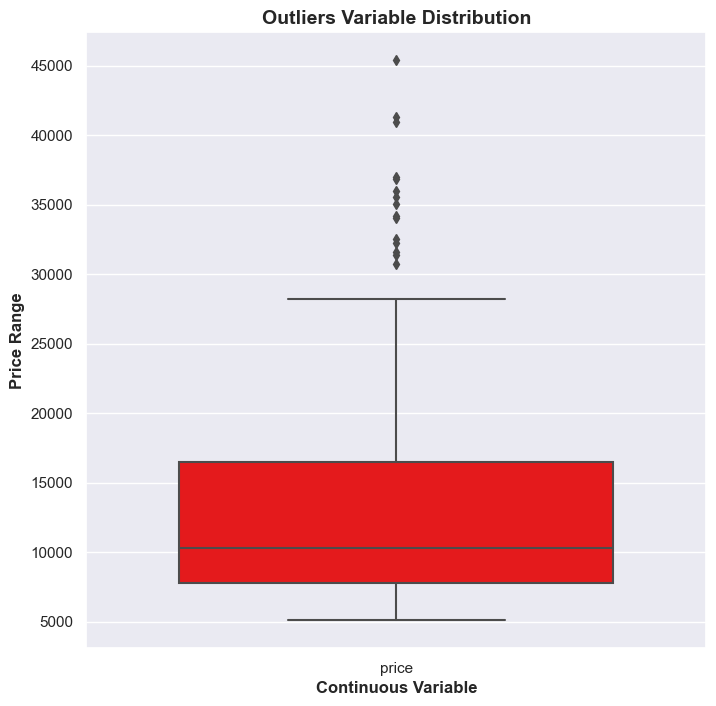

In [17]:
# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape

#### Insights: 
- There are some price ranges above 36000 which can be termed as outliers but lets not remove it rather we will use standarization scaling.

In [18]:
# Extracting Car Company from the CarName as per direction in Problem 

# df['CarName'] = df['CarName'].str.split(' ',expand=True)

# Create 'CompanyName' column by extracting the company name from 'CarName'
df['CompanyName'] = df['CarName'].apply(lambda x: x.split(' ')[0])

# List down the unique 'CompanyName'
unique_companies = df['CompanyName'].unique()

# Display the unique company names
print(unique_companies)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


**Typo Error in Car Company name**
- maxda = mazda
- Nissan = nissan
- porsche = porcshce
- toyota = toyouta
- vokswagen = volkswagen = vw

In [19]:
# Create 'CompanyName' column by extracting the company name from 'CarName'
df['CompanyName'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Standardize company names
df['CompanyName'].replace({
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}, inplace=True)

# List down the unique 'CompanyName'
unique_companies = df['CompanyName'].unique()

# Display the unique company names
print(unique_companies)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [20]:
# changing the datatype of symboling as it is categorical variable as per dictionary file
df['symboling'] = df['symboling'].astype(str)

In [21]:
# checking for duplicates
df.loc[df.duplicated()]

Empty DataFrame
Columns: [symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price, CompanyName]
Index: []

In [22]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

<a id="3"></a> <br>
##  Visualising the Data

- Here we will identify if some predictors directly have a strong association with the outcome variable `price`

Text(0, 0.5, 'Count of Cars')

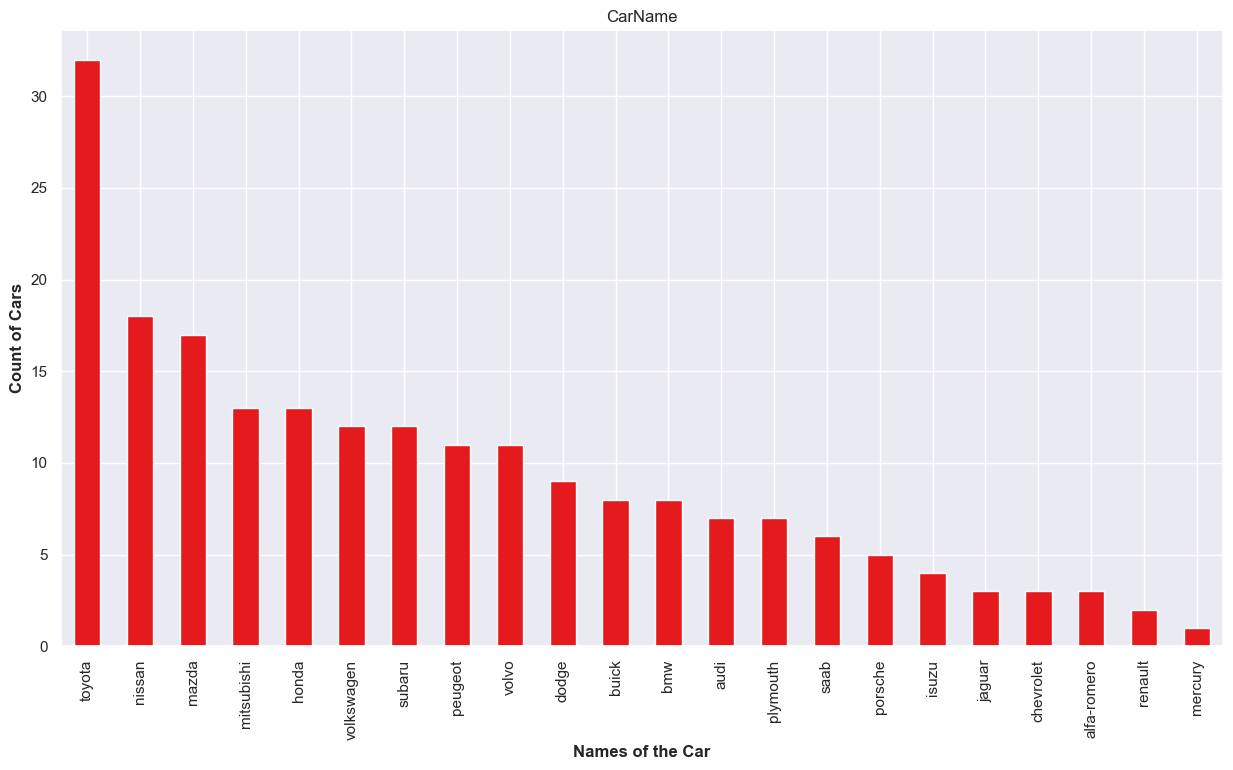

In [23]:
# Visualizing the different car names available

plt.rcParams['figure.figsize'] = [15,8]
ax=df['CompanyName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

#### Insights:
- Toyota seems to be the most favoured cars.
- Mercury seems to be the least favoured cars.

\#### Visualizing the distribution of car prices

<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

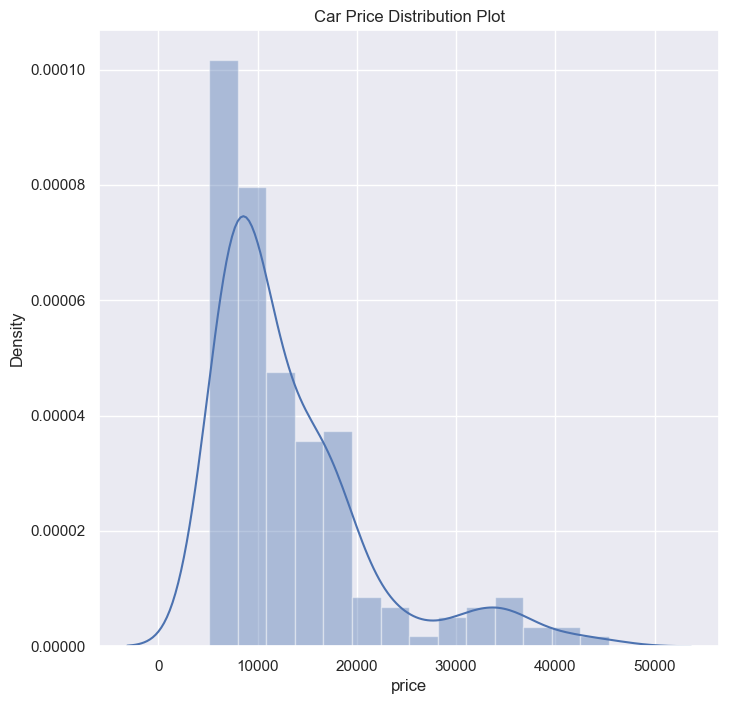

In [24]:
plt.figure(figsize=(8,8))
plt.title('Car Price Distribution Plot')
sns.distplot(df['price'])

- The plots seems to be right skewed, the prices of almost all cars looks like less than 18000.


#### Visualising Numeric Variables

Pairplot of all the numeric variables

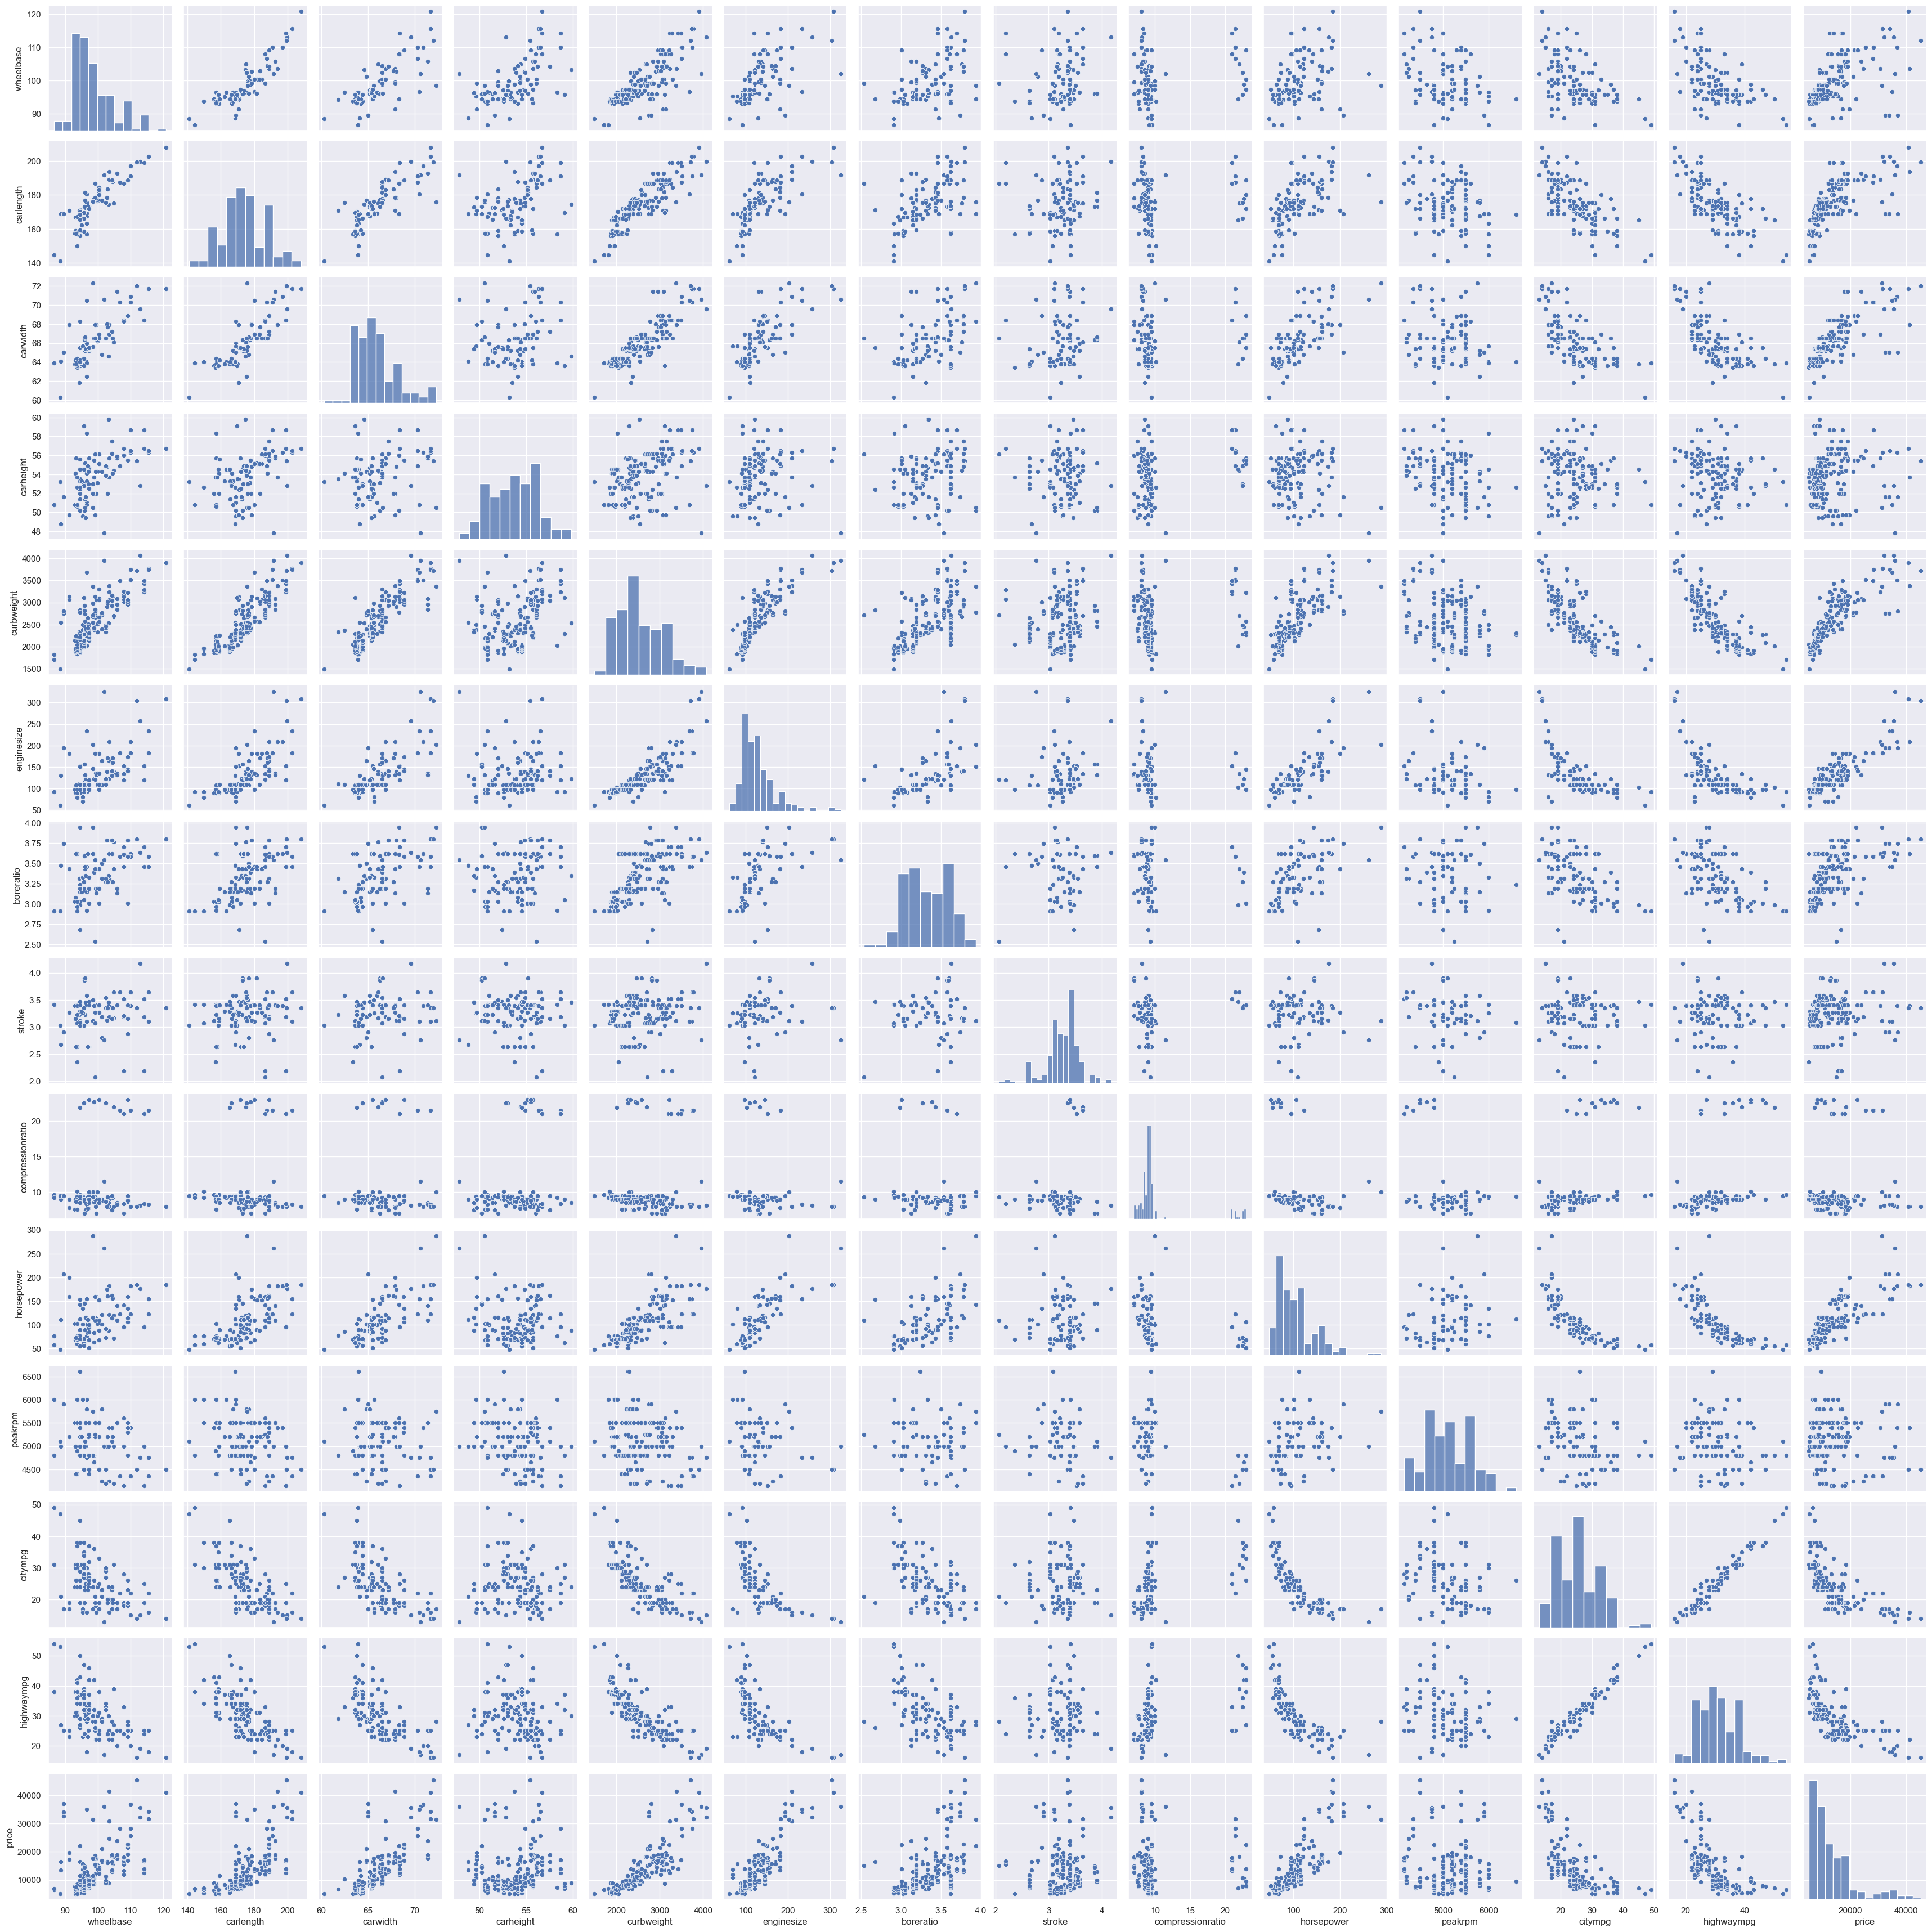

In [25]:
ax = sns.pairplot(df[num_col])

#### Insights:
- `carwidth` , `carlength`, `curbweight` ,`enginesize` ,`horsepower`seems to have a poitive correlation with price.
- `carheight` doesn't show any significant trend with price.
- `citympg` , `highwaympg` - seem to have a significant negative correlation with price.

#### Visualising few more Categorical Variables

Boxplot of all the categorical variables

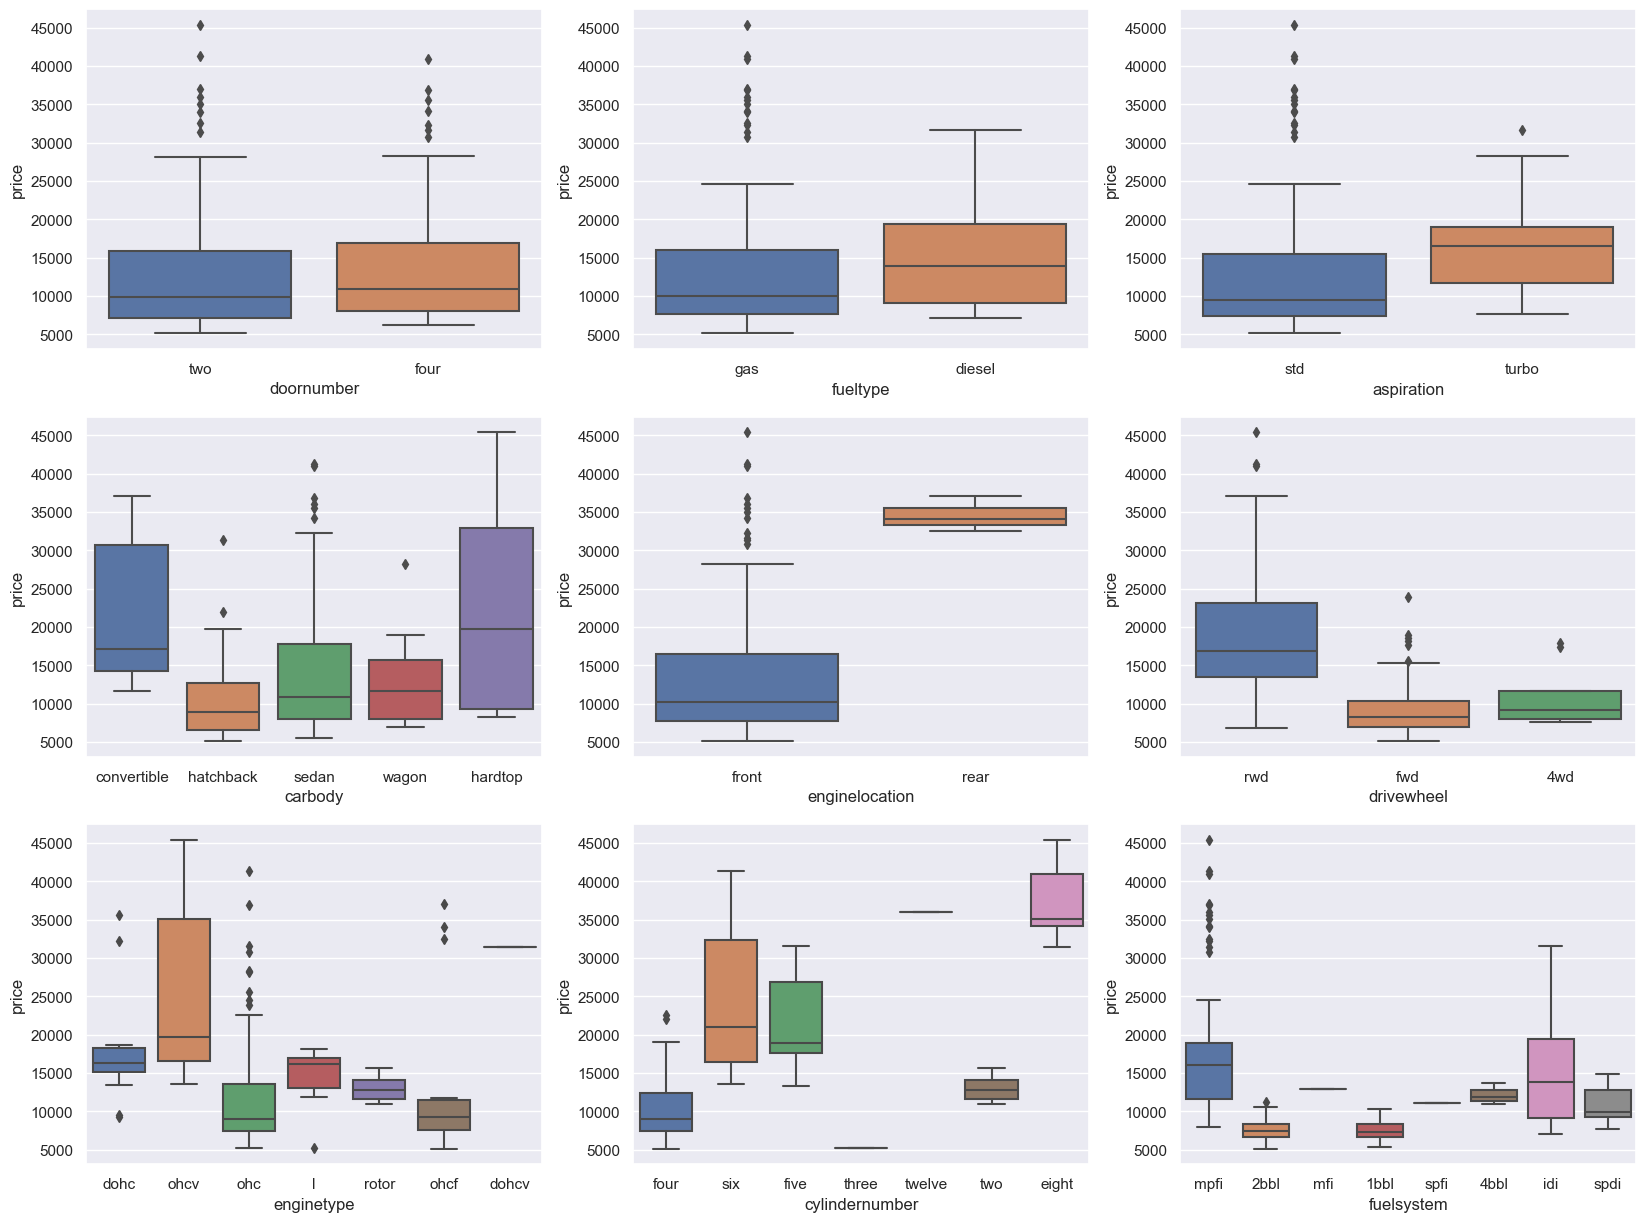

In [26]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

#### Insights
- The cars with `fueltype` as `diesel` are comparatively expensive than the cars with `fueltype` as `gas`.
- All the types of carbody is relatively cheaper as compared to `convertible` carbody.
- The cars with `rear enginelocation` are way expensive than cars with `front enginelocation`.
- The price of car is directly proportional to `no. of cylinders` in most cases.
- Enginetype `ohcv` comes into higher price range cars.
- `DoorNumber` isn't affecting the price much.
- HigerEnd cars seems to have `rwd` drivewheel

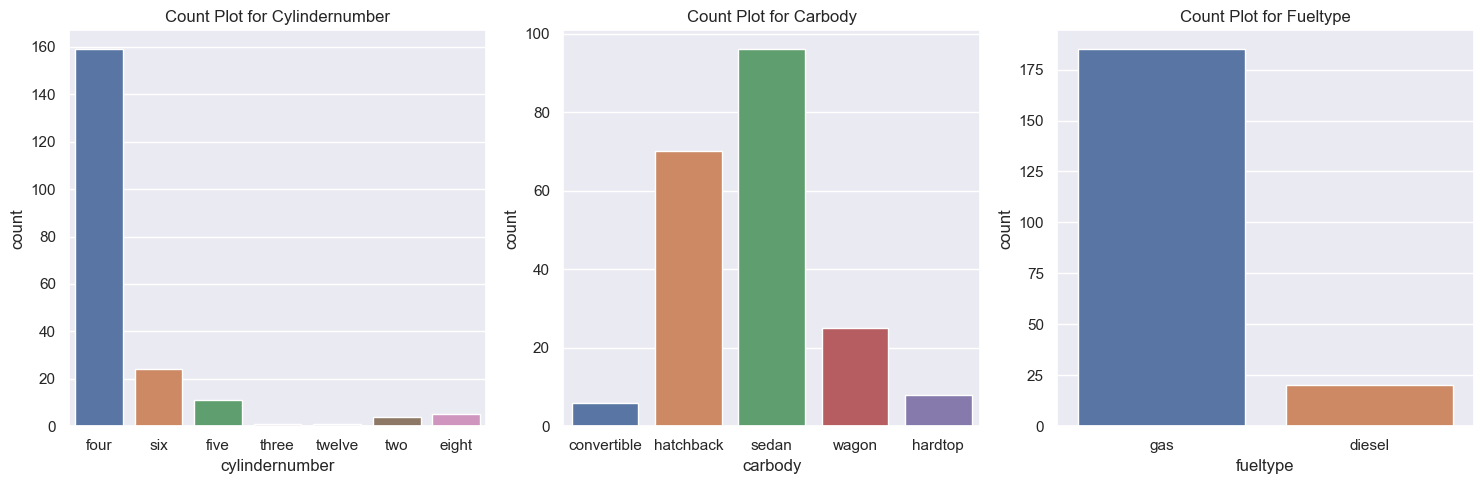

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the relevant columns
plt.figure(figsize=(15, 5))

# Count plot for cylindernumber
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='cylindernumber')
plt.title('Count Plot for Cylindernumber')

# Count plot for carbody
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='carbody')
plt.title('Count Plot for Carbody')

# Count plot for fueltype
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='fueltype')
plt.title('Count Plot for Fueltype')

plt.tight_layout()
plt.show()


#### Insights:
- The number of cylinders used in most cars is `four`.
- Number of `Gas` fueled cars are way more than `diesel` fueled cars.
- `Sedan` is the most prefered car type.

#### Relationship between `fuelsystem` vs `price` with hue `fueltype`

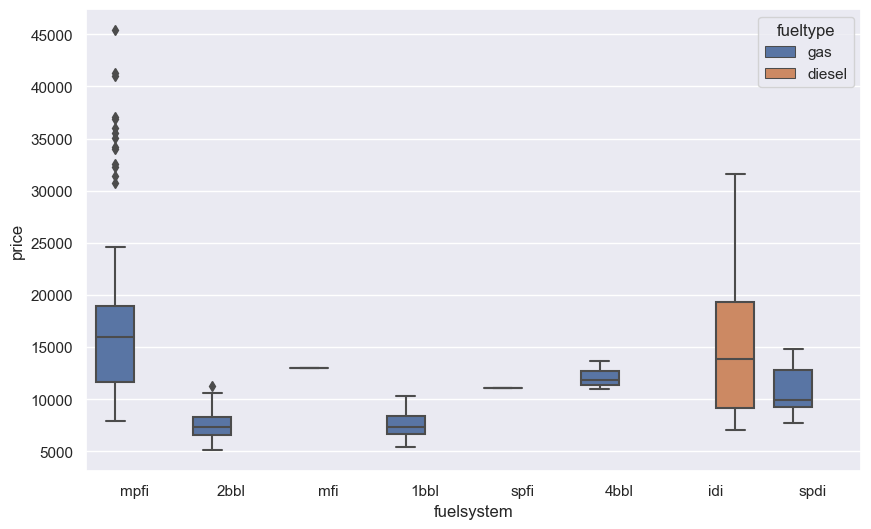

In [28]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df)
plt.show()

#### Relationship between `carbody` vs `price` with hue `enginelocation`

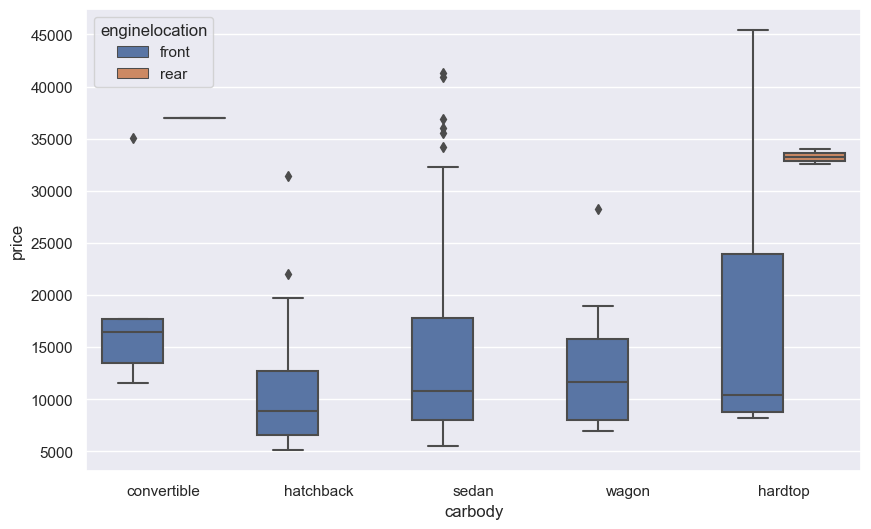

In [29]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df)
plt.show()

#### Relationship between `cylindernumber` vs `price` with hue `fueltype`

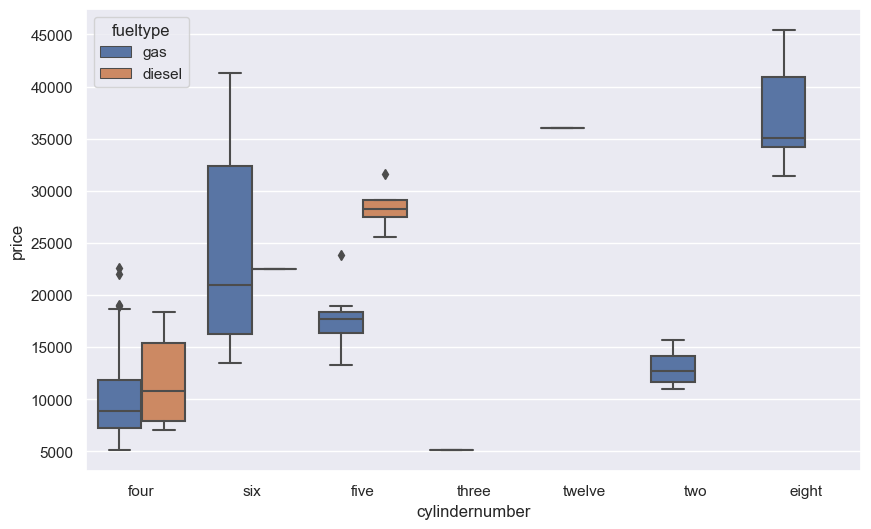

In [30]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = df)
plt.show()

#### Derived Metrices
- Average Price

<Figure size 2000x600 with 0 Axes>

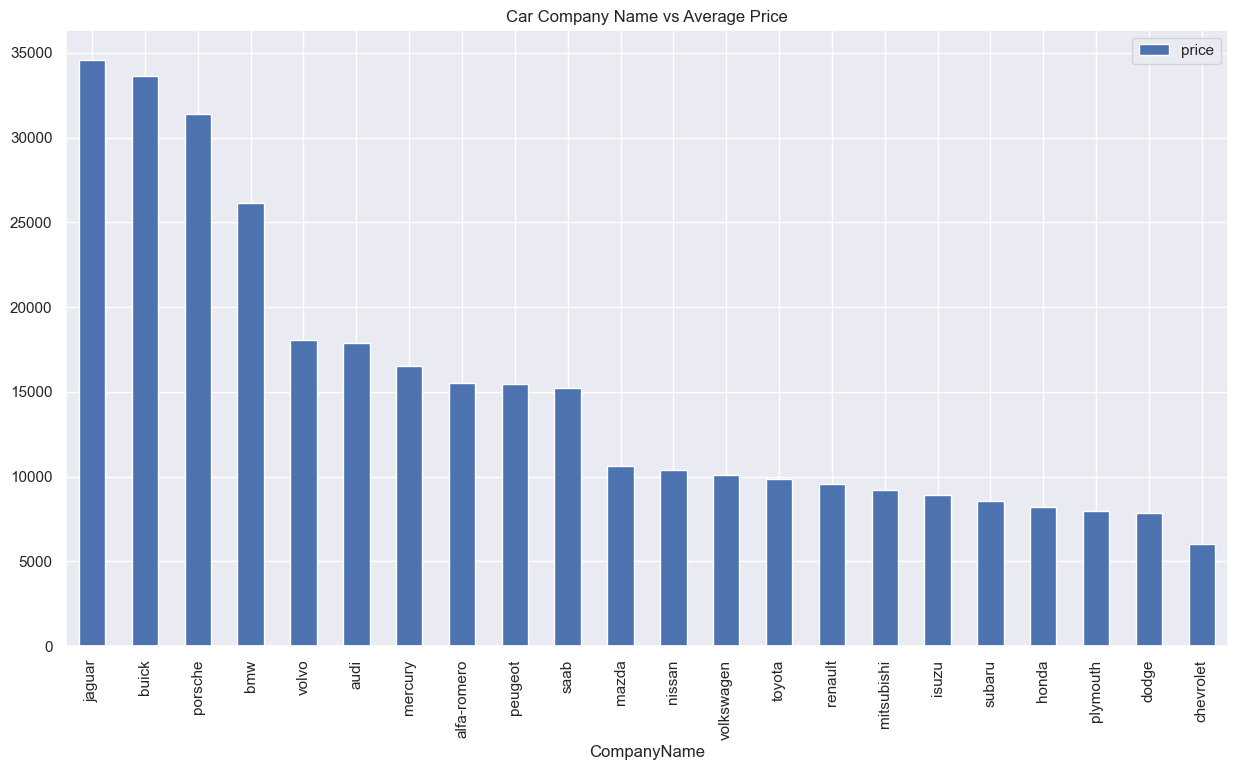

In [31]:
plt.figure(figsize=(20, 6))
df_autox = pd.DataFrame(df.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

#### Insights:
- `Jaguar`,`Buick` and `porsche` seems to have the highest average price.

<Figure size 2000x600 with 0 Axes>

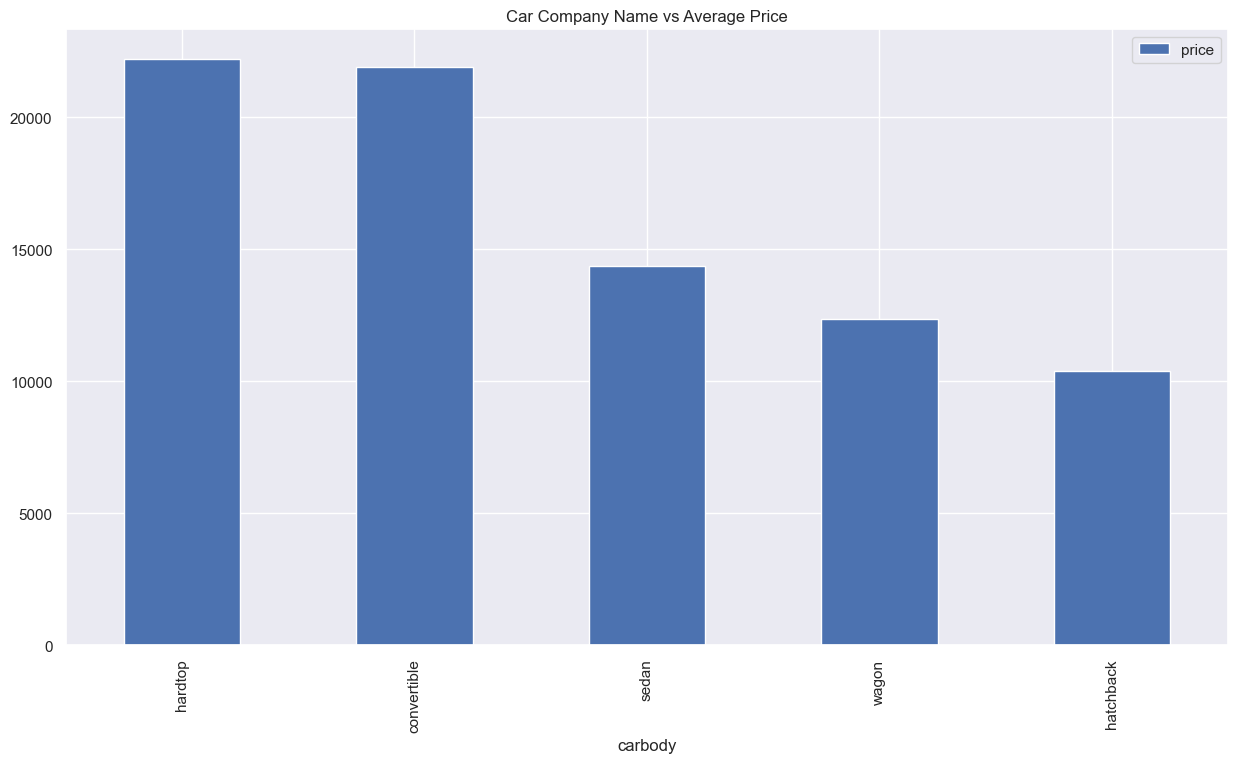

In [32]:
plt.figure(figsize=(20, 6))

df_autoy = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_autoy.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

#### Insights:
- `hardtop` and `convertible` seems to have the highest average price.

In [33]:
#Binning the Car Companies based on avg prices of each car Company.

df['price'] = df['price'].astype('int')
df_temp = df.copy()
t = df.groupby(['CompanyName'])['price'].mean()
df_temp = df.merge(t.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df['Cars_Category'] = pd.cut(df_temp['price_y'],bins,right=False,labels=label)
df.head()

symboling                   CarName fueltype aspiration doornumber  \
0  3         alfa-romero giulia        gas      std        two         
1  3         alfa-romero stelvio       gas      std        two         
2  1         alfa-romero Quadrifoglio  gas      std        two         
3  2         audi 100 ls               gas      std        four        
4  2         audi 100ls                gas      std        four        

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible  rwd        front         88.6000    168.8000   64.1000     
1  convertible  rwd        front         88.6000    168.8000   64.1000     
2  hatchback    rwd        front         94.5000    171.2000   65.5000     
3  sedan        fwd        front         99.8000    176.6000   66.2000     
4  sedan        4wd        front         99.4000    176.6000   66.4000     

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0 48.8000     2548        dohc       four           130         mpfi        
1 48.8000     2548        dohc       four           130         mpfi        
2 52.4000     2823        ohcv       six            152         mpfi        
3 54.3000     2337        ohc        four           109         mpfi        
4 54.3000     2824        ohc        five           136         mpfi        

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0 3.4700     2.6800  9.0000             111         5000     21        
1 3.4700     2.6800  9.0000             111         5000     21        
2 2.6800     3.4700  9.0000             154         5000     19        
3 3.1900     3.4000  10.0000            102         5500     24        
4 3.1900     3.4000  8.0000             115         5500     18        

   highwaympg  price  CompanyName Cars_Category  
0  27          13495  alfa-romero  Medium_Range  
1  27          16500  alfa-romero  Medium_Range  
2  26          16500  alfa-romero  Medium_Range  
3  30          13950  audi         Medium_Range  
4  22          17450  audi         Medium_Range

In [34]:
# dropping car_ID based on business knowledge

df = df.drop('CarName',axis=1)

#### Significant variables after Visualization
- Cars_Category , Engine Type, Fuel Type
- Car Body , Aspiration , Cylinder Number 
- Drivewheel , Curbweight , Car Length 
- Car Length , Car width , Engine Size
- Boreratio , Horse Power , Wheel base 
- citympg , highwaympg , symboling

In [35]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration',
           'carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio',
           'horsepower','citympg','highwaympg', 'carlength','carwidth']

In [36]:
df = df[sig_col]

<a id="4"></a> <br>
##  Data Preparation

#### Dummy Variables

The variable `carbody` has five levels. We need to convert these levels into integer. Similarly we need to convert the categorical variables to numeric.

For this, we will use something called `dummy variables`.

In [37]:
sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']

In [38]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(df[sig_cat_col])
dummies.shape

(205, 29)

In [39]:
dummies = pd.get_dummies(df[sig_cat_col], drop_first = True)
dummies.shape

(205, 22)

In [40]:
# Add the results to the original dataframe

df = pd.concat([df, dummies], axis = 1)

In [41]:
# Drop the original cat variables as dummies are already created

df.drop( sig_cat_col, axis = 1, inplace = True)
df.shape

(205, 32)

<a id="5"></a> <br>
##  Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [42]:
df

price  wheelbase  curbweight  enginesize  boreratio  horsepower  citympg  \
0    13495 88.6000     2548        130        3.4700      111         21        
1    16500 88.6000     2548        130        3.4700      111         21        
2    16500 94.5000     2823        152        2.6800      154         19        
3    13950 99.8000     2337        109        3.1900      102         24        
4    17450 99.4000     2824        136        3.1900      115         18        
..     ...     ...      ...        ...           ...      ...         ..        
200  16845 109.1000    2952        141        3.7800      114         23        
201  19045 109.1000    3049        141        3.7800      160         19        
202  21485 109.1000    3012        173        3.5800      134         18        
203  22470 109.1000    3217        145        3.0100      106         26        
204  22625 109.1000    3062        141        3.7800      114         19        

     highwaympg  carlength  carwidth  Cars_Category_Medium_Range  \
0    27         168.8000   64.1000    1                            
1    27         168.8000   64.1000    1                            
2    26         171.2000   65.5000    1                            
3    30         176.6000   66.2000    1                            
4    22         176.6000   66.4000    1                            
..   ..              ...       ...   ..                            
200  28         188.8000   68.9000    1                            
201  25         188.8000   68.8000    1                            
202  23         188.8000   68.9000    1                            
203  27         188.8000   68.9000    1                            
204  25         188.8000   68.9000    1                            

     Cars_Category_TopNotch_Cars  fueltype_gas  aspiration_turbo  \
0    0                            1             0                  
1    0                            1             0                  
2    0                            1             0                  
3    0                            1             0                  
4    0                            1             0                  
..  ..                           ..            ..                  
200  0                            1             0                  
201  0                            1             1                  
202  0                            1             0                  
203  0                            0             1                  
204  0                            1             1                  

     carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0    0                0                  0              0               
1    0                0                  0              0               
2    0                1                  0              0               
3    0                0                  1              0               
4    0                0                  1              0               
..  ..               ..                 ..             ..               
200  0                0                  1              0               
201  0                0                  1              0               
202  0                0                  1              0               
203  0                0                  1              0               
204  0                0                  1              0               

     drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  \
0    0               1               0                 0              
1    0               1               0                 0              
2    0               1               0                 0              
3    1               0               0                 0              
4    0               0               0                 0              
..  ..              ..              ..                ..              
200  0               1  

In [43]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 70/30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [44]:
df_train.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  citympg  \
122  7609  93.7000     2191        98         2.9700      68          31        
125  22018 94.5000     2778        151        3.9400      143         19        
166  9538  94.5000     2300        98         3.2400      112         26        
1    16500 88.6000     2548        130        3.4700      111         21        
199  18950 104.3000    3157        130        3.6200      162         17        

     highwaympg  carlength  carwidth  Cars_Category_Medium_Range  \
122  38         167.3000   63.8000    0                            
125  27         168.9000   68.3000    0                            
166  29         168.7000   64.0000    0                            
1    27         168.8000   64.1000    1                            
199  22         188.8000   67.2000    1                            

     Cars_Category_TopNotch_Cars  fueltype_gas  aspiration_turbo  \
122  0                            1             0                  
125  1                            1             0                  
166  0                            1             0                  
1    0                            1             0                  
199  0                            1             1                  

     carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
122  0                0                  1              0               
125  0                1                  0              0               
166  0                1                  0              0               
1    0                0                  0              0               
199  0                0                  0              1               

     drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  \
122  1               0               0                 0              
125  0               1               0                 0              
166  0               1               0                 0              
1    0               1               0                 0              
199  0               1               0                 0              

     enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \
122  1               0                0                0                  
125  1               0                0                0                  
166  0               0                0                0                  
1    0               0                0                0                  
199  1               0                0                0                  

     cylindernumber_five  cylindernumber_four  cylindernumber_six  \
122  0                    1                    0                    
125  0                    1                    0                    
166  0                    1                    0                    
1    0                    1                    0                    
199  0                    1                    0                    

     cylindernumber_three  cylindernumber_twelve  cylindernumber_two  
122  0                     0                      0                   
125  0                     0                      0                   
166  0                     0                      0                   
1    0                     0                      0                   
199  0                     0                      0

### Rescaling the Features 

For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Standardisation Scaling.

In [45]:
scaler = preprocessing.StandardScaler()

In [46]:
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio',
               'horsepower','citympg','highwaympg','price']

In [47]:
# Apply scaler() to all the columns except the 'dummy' variables
import warnings
warnings.filterwarnings("ignore")

df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])

In [48]:
df_train.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
122 -0.7002 -0.8118    -0.6421     -0.6602     -1.2973    -0.8729       
125 1.1519  -0.6772    0.4394      0.6378      2.4323     1.0218        
166 -0.4522 -0.6772    -0.4413     -0.6602     -0.2592    0.2387        
1   0.4426  -1.6703    0.0156      0.1235      0.6251     0.2134        
199 0.7576  0.9724     1.1377      0.1235      1.2019     1.5018        

     citympg  highwaympg  carlength  carwidth  Cars_Category_Medium_Range  \
122 0.8398   1.0254      -0.4872    -0.9245    0                            
125 -0.9570  -0.5575     -0.3598    1.1150     0                            
166 0.0911   -0.2697     -0.3757    -0.8339    0                            
1   -0.6576  -0.5575     -0.3678    -0.7885    1                            
199 -1.2565  -1.2770     1.2254     0.6164     1                            

     Cars_Category_TopNotch_Cars  fueltype_gas  aspiration_turbo  \
122  0                            1             0                  
125  1                            1             0                  
166  0                            1             0                  
1    0                            1             0                  
199  0                            1             1                  

     carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
122  0                0                  1              0               
125  0                1                  0              0               
166  0                1                  0              0               
1    0                0                  0              0               
199  0                0                  0              1               

     drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  \
122  1               0               0                 0              
125  0               1               0                 0              
166  0               1               0                 0              
1    0               1               0                 0              
199  0               1               0                 0              

     enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \
122  1               0                0                0                  
125  1               0                0                0                  
166  0               0                0                0                  
1    0               0                0                0                  
199  1               0                0                0                  

     cylindernumber_five  cylindernumber_four  cylindernumber_six  \
122  0                    1                    0                    
125  0                    1                    0                    
166  0                    1                    0                    
1    0                    1                    0                    
199  0                    1                    0                    

     cylindernumber_three  cylindernumber_twelve  cylindernumber_two  
122  0                     0                      0                   
125  0                     0                      0                   
166  0                     0                      0                   
1    0                     0                      0                   
199  0                     0                      0

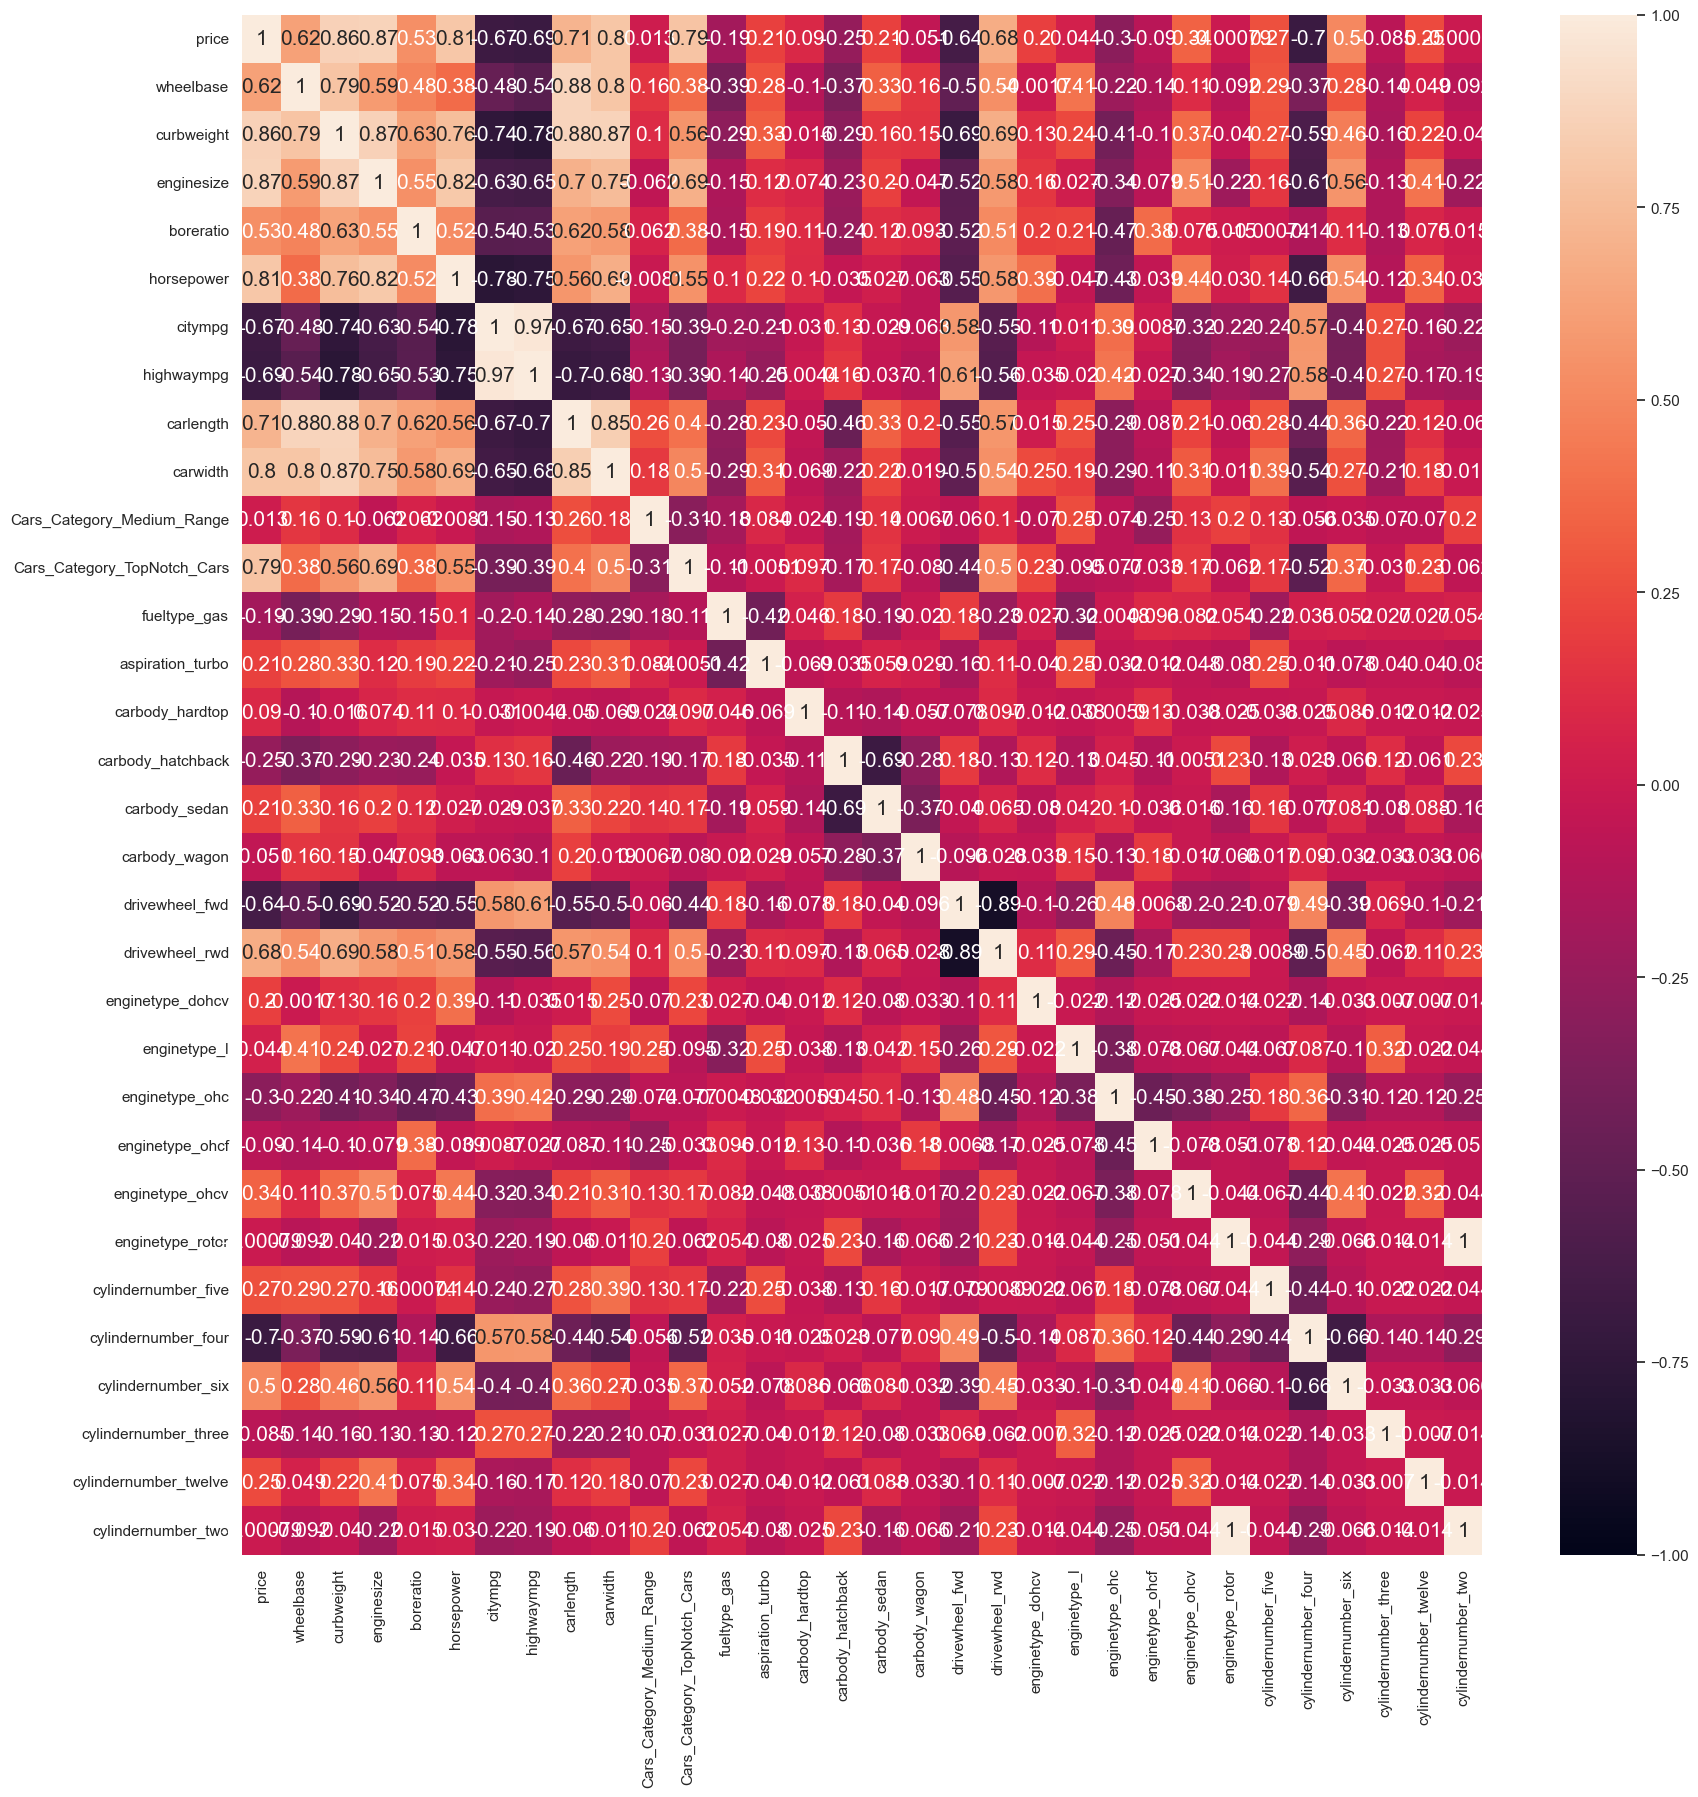

In [49]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), vmax=1.0, vmin=-1.0, annot = True , annot_kws={"size": 15})
plt.show()

Let's see scatterplot for few correlated variables  vs `price`.

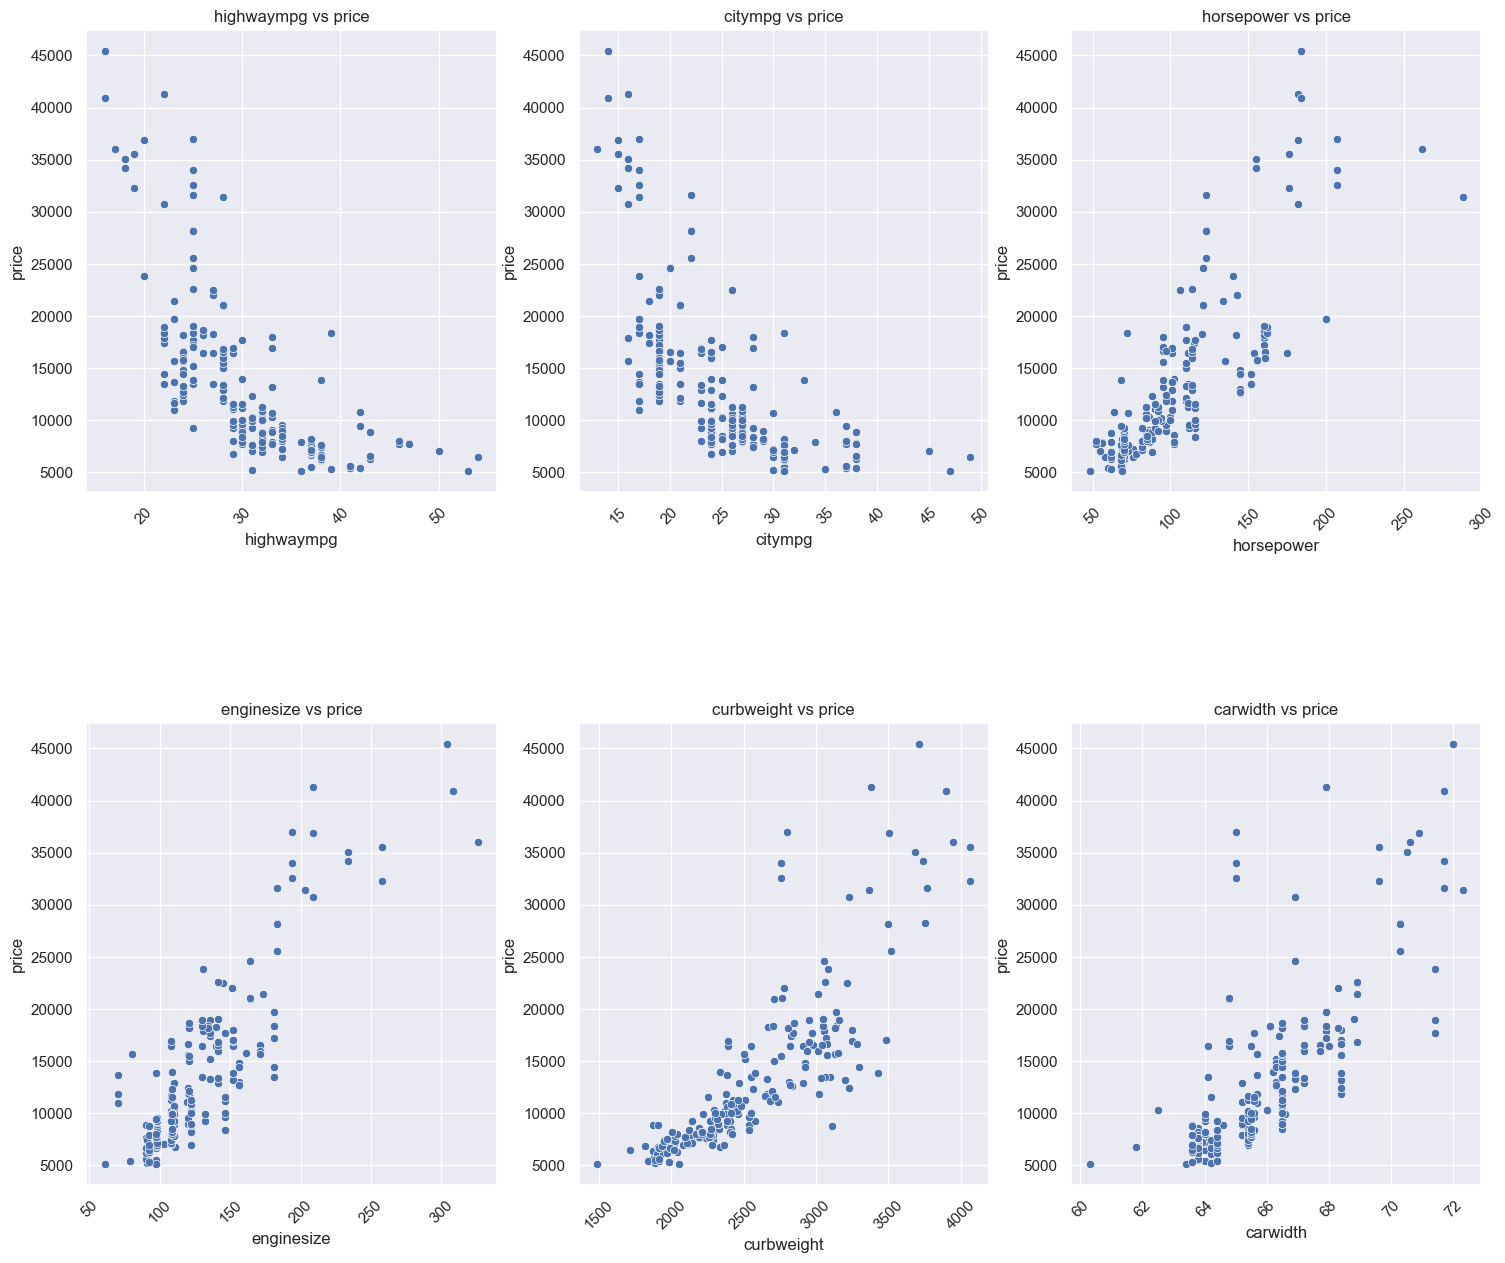

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with independent and dependent variables
# Replace 'col' with a list of your actual column names

fig, axes = plt.subplots(2, 3, figsize=(18, 15))

# Example list of column names
col = ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth']

for i, col_name in enumerate(col):
    sns.scatterplot(x=col_name, y='price', data=df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"{col_name} vs price")
    axes[i//3, i%3].tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=0.5)
plt.show()


- We can see there is a line we can fit in above plots

### Dividing into X and Y sets for the model building

In [51]:
y_train = df_train.pop('price')
X_train = df_train

<a id="6"></a> <br>
##  Building a Linear Model

In [52]:
X_train_1 = X_train['horsepower']

In [53]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [54]:
# Check parameters created

lr_1.params

const        0.0000
horsepower   0.8062
dtype: float64

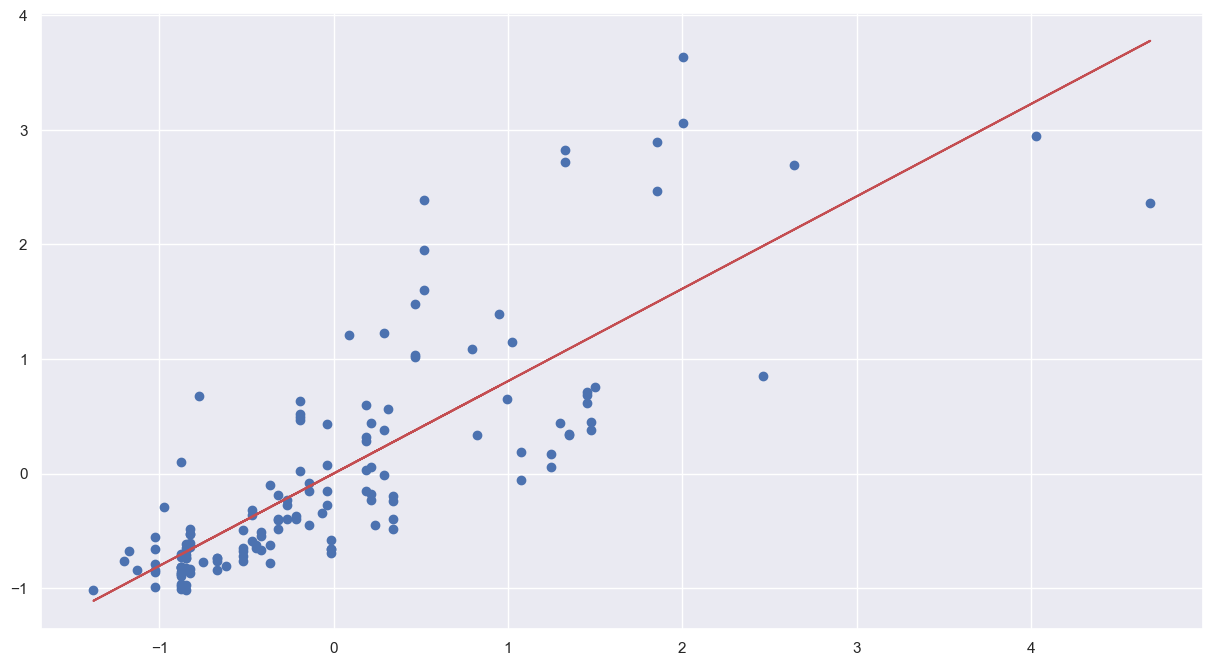

In [55]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [56]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Thu, 09 May 2024   Prob (F-statistic):           6.05e-34
Time:                        23:20:51   Log-Likelihood:                -127.86
No. Observations:                 143   AIC:                             259.7
Df Residuals:                     141   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.674e-17      0.050   1.74e-15      1.0

### Adding another variable

The R-squared value obtained is `0.65`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the other highly correlated variable, i.e. `curbweight`.

In [57]:
X_train_2 = X_train[['horsepower', 'curbweight']]

In [58]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [59]:
lr_2.params

const        0.0000
horsepower   0.3581
curbweight   0.5898
dtype: float64

In [60]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     274.8
Date:                Thu, 09 May 2024   Prob (F-statistic):           3.34e-49
Time:                        23:21:11   Log-Likelihood:                -88.896
No. Observations:                 143   AIC:                             183.8
Df Residuals:                     140   BIC:                             192.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.674e-17      0.038   2.28e-15      1.0

* The R-squared incresed from 0.650 to 0.797 

### Adding another variable

The R-squared value obtained is `0.797`. Since we have so many variables, we can clearly do better than this. So lets add another correlated variable, i.e. `enginesize`.

In [61]:
X_train_3 = X_train[['horsepower', 'curbweight', 'enginesize']]

In [62]:
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [63]:
lr_3.params

const        0.0000
horsepower   0.2288
curbweight   0.3938
enginesize   0.3400
dtype: float64

In [64]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Thu, 09 May 2024   Prob (F-statistic):           2.16e-51
Time:                        23:21:17   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.021e-17      0.036    2.5e-15      1.0

We have achieved a R-squared of `0.819` by manually picking the highly correlated variables.
Now lets use RFE to select the independent variables which accurately predicts the dependent variable `price`.

### RFE
Let's use Recursive feature elimination since we have too many independent variables

In [65]:
# Running RFE with the output number of the variable equal to 15
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are your feature matrix and target variable
lm = LinearRegression()

# Initialize RFE with the model and the desired number of features
rfe = RFE(lm, n_features_to_select=15)

# Fit RFE
rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 5),
 ('curbweight', True, 1),
 ('enginesize', False, 11),
 ('boreratio', False, 8),
 ('horsepower', True, 1),
 ('citympg', False, 17),
 ('highwaympg', False, 4),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('Cars_Category_Medium_Range', False, 3),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('fueltype_gas', False, 9),
 ('aspiration_turbo', False, 13),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 6),
 ('drivewheel_rwd', False, 10),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 16),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 7),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 14)]

In [67]:
# Selecting the variables which are in support

col_sup = X_train.columns[rfe.support_]
col_sup

Index(['curbweight', 'horsepower', 'carwidth', 'Cars_Category_TopNotch_Cars',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [68]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col_sup]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.
- High p-value High VIF : Drop the variable
- High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

In [69]:
# Adding a constant variable and Build a first fitted model
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.2
Date:                Thu, 09 May 2024   Prob (F-statistic):           3.41e-68
Time:                        23:21:30   Log-Likelihood:                -6.1473
No. Observations:                 143   AIC:                             44.29
Df Residuals:                     127   BIC:                             91.70
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

- Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables)<br>
and we need to drop it

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
12  cylindernumber_four         15.9200
6   carbody_sedan               9.7300 
0   curbweight                  9.0600 
2   carwidth                    6.2400 
5   carbody_hatchback           6.1500 
9   enginetype_ohc              5.9700 
1   horsepower                  5.6100 
13  cylindernumber_six          4.7300 
7   carbody_wagon               3.4800 
11  cylindernumber_five         2.8200 
3   Cars_Category_TopNotch_Cars 2.1700 
8   enginetype_dohcv            1.8400 
14  cylindernumber_twelve       1.6600 
10  enginetype_ohcv             1.6300 
4   carbody_hardtop             1.4500

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

*Dropping `cylindernumber_twelve` beacuse its `p-value` is `0.393` and we want p-value less than 0.05 and hence rebuilding the model*

In [71]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe1 = X_train_rfe.drop('cylindernumber_twelve', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     133.3
Date:                Thu, 09 May 2024   Prob (F-statistic):           4.16e-69
Time:                        23:21:39   Log-Likelihood:                -6.5600
No. Observations:                 143   AIC:                             43.12
Df Residuals:                     128   BIC:                             87.56
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
12  cylindernumber_four         15.2700
0   curbweight                  9.0600 
6   carbody_sedan               9.0500 
2   carwidth                    6.1500 
5   carbody_hatchback           5.9500 
9   enginetype_ohc              5.9200 
1   horsepower                  4.6900 
13  cylindernumber_six          3.7000 
7   carbody_wagon               3.3100 
11  cylindernumber_five         2.6600 
3   Cars_Category_TopNotch_Cars 2.1400 
8   enginetype_dohcv            1.6700 
10  enginetype_ohcv             1.5300 
4   carbody_hardtop             1.4500

*Dropping `cylindernumber_six` beacuse its `p-value` is `0.493` and we want p-value less than 0.05 and hence rebuilding the model*

In [73]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe2 = X_train_rfe1.drop('cylindernumber_six', 1,)

# Adding a constant variable and Build a third fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.1
Date:                Thu, 09 May 2024   Prob (F-statistic):           4.29e-70
Time:                        23:21:44   Log-Likelihood:                -6.8230
No. Observations:                 143   AIC:                             41.65
Df Residuals:                     129   BIC:                             83.13
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12  cylindernumber_four         8.9900
0   curbweight                  8.5300
2   carwidth                    5.7200
9   enginetype_ohc              5.6500
6   carbody_sedan               5.2400
1   horsepower                  4.5300
5   carbody_hatchback           3.7600
7   carbody_wagon               2.3600
3   Cars_Category_TopNotch_Cars 2.1300
11  cylindernumber_five         1.9700
8   enginetype_dohcv            1.6000
10  enginetype_ohcv             1.5200
4   carbody_hardtop             1.2800

*Dropping `carbody_hardtop` beacuse its `p-value` is `0.238` and we want p-value less than 0.05 and hence rebuilding the model*

In [75]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe3 = X_train_rfe2.drop('carbody_hardtop', 1,)

# Adding a constant variable and Build a fourth fitted model
X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     155.5
Date:                Thu, 09 May 2024   Prob (F-statistic):           6.73e-71
Time:                        23:21:49   Log-Likelihood:                -7.5979
No. Observations:                 143   AIC:                             41.20
Df Residuals:                     130   BIC:                             79.71
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0   curbweight                  8.5100
11  cylindernumber_four         8.0900
2   carwidth                    5.6500
8   enginetype_ohc              5.6000
5   carbody_sedan               4.6400
1   horsepower                  4.1700
4   carbody_hatchback           3.3100
6   carbody_wagon               2.2200
3   Cars_Category_TopNotch_Cars 2.0800
10  cylindernumber_five         1.9300
7   enginetype_dohcv            1.5800
9   enginetype_ohcv             1.5200

*Dropping `enginetype_ohc` beacuse its `p-value` is `0.110` and we want p-value less than 0.05 and hence rebuilding the model*

In [77]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe4 = X_train_rfe3.drop('enginetype_ohc', 1,)

# Adding a constant variable and Build a fifth fitted model
X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     167.4
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.81e-71
Time:                        23:21:53   Log-Likelihood:                -9.0049
No. Observations:                 143   AIC:                             42.01
Df Residuals:                     131   BIC:                             77.56
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0   curbweight                  8.2500
10  cylindernumber_four         6.8000
2   carwidth                    5.6500
5   carbody_sedan               4.3300
1   horsepower                  4.1700
4   carbody_hatchback           3.1000
6   carbody_wagon               2.2000
3   Cars_Category_TopNotch_Cars 1.8300
9   cylindernumber_five         1.6300
7   enginetype_dohcv            1.5700
8   enginetype_ohcv             1.5100

*Dropping `cylindernumber_five` beacuse its `p-value` is `0.104` and we want p-value less than 0.05 and hence rebuilding the model*

In [79]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe5 = X_train_rfe4.drop('cylindernumber_five', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     181.6
Date:                Thu, 09 May 2024   Prob (F-statistic):           4.91e-72
Time:                        23:21:55   Log-Likelihood:                -10.457
No. Observations:                 143   AIC:                             42.91
Df Residuals:                     132   BIC:                             75.51
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  curbweight                  8.1000
9  cylindernumber_four         5.7600
2  carwidth                    5.0800
1  horsepower                  4.1300
5  carbody_sedan               3.5200
4  carbody_hatchback           2.6300
6  carbody_wagon               1.9400
3  Cars_Category_TopNotch_Cars 1.8300
7  enginetype_dohcv            1.5400
8  enginetype_ohcv             1.4300

*Dropping `enginetype_ohcv` beacuse its `p-value` is `0.180` and we want p-value less than 0.05 and hence rebuilding the model*

In [81]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe6 = X_train_rfe5.drop('enginetype_ohcv', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.3
Date:                Thu, 09 May 2024   Prob (F-statistic):           8.26e-73
Time:                        23:21:58   Log-Likelihood:                -11.434
No. Observations:                 143   AIC:                             42.87
Df Residuals:                     133   BIC:                             72.50
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  curbweight                  8.1000
8  cylindernumber_four         5.6600
2  carwidth                    5.0800
1  horsepower                  3.8100
5  carbody_sedan               3.3500
4  carbody_hatchback           2.4700
6  carbody_wagon               1.8900
3  Cars_Category_TopNotch_Cars 1.8100
7  enginetype_dohcv            1.4900

*Dropping `curbweight` beacuse its `VIF` is `8.1` and we want VIF less than 5 and hence rebuilding the model*

In [83]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe7 = X_train_rfe6.drop('curbweight', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 09 May 2024   Prob (F-statistic):           4.86e-71
Time:                        23:22:01   Log-Likelihood:                -18.737
No. Observations:                 143   AIC:                             55.47
Df Residuals:                     134   BIC:                             82.14
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7  cylindernumber_four         5.6600
4  carbody_sedan               3.3500
0  horsepower                  2.7200
3  carbody_hatchback           2.4000
1  carwidth                    2.2200
2  Cars_Category_TopNotch_Cars 1.7300
5  carbody_wagon               1.7100
6  enginetype_dohcv            1.2400

*Dropping `cylindernumber_four` beacuse its `VIF` is `5.66` and we want VIF less than 5 and hence rebuilding the model*

In [85]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe8 = X_train_rfe7.drop('cylindernumber_four', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe8c = sm.add_constant(X_train_rfe8)
lm_rfe8 = sm.OLS(y_train, X_train_rfe8c).fit()

#Summary of linear model
print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Thu, 09 May 2024   Prob (F-statistic):           4.70e-70
Time:                        23:22:03   Log-Likelihood:                -24.089
No. Observations:                 143   AIC:                             64.18
Df Residuals:                     135   BIC:                             87.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  horsepower                  2.4500
1  carwidth                    2.1200
2  Cars_Category_TopNotch_Cars 1.7000
4  carbody_sedan               1.2200
6  enginetype_dohcv            1.2200
3  carbody_hatchback           1.1000
5  carbody_wagon               1.0200

Lets drop `carbody_sedan` and see if there is any drastic fall in R squared.If not we can drop `carbody sedan`.
Our aim is to explain the maximum variance with minimum variable.

In [87]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe9 = X_train_rfe8.drop('carbody_sedan', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe9c = sm.add_constant(X_train_rfe9)
lm_rfe9 = sm.OLS(y_train, X_train_rfe9c).fit()

#Summary of linear model
print(lm_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.68e-69
Time:                        23:22:06   Log-Likelihood:                -28.398
No. Observations:                 143   AIC:                             70.80
Df Residuals:                     136   BIC:                             91.54
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

The R squared value just dropped by `0.005`.Hence we can proceed with dropping `carbody_sedan`.

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe9.values, i) for i in range(X_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  horsepower                  2.3100
1  carwidth                    2.0800
2  Cars_Category_TopNotch_Cars 1.4600
5  enginetype_dohcv            1.2200
3  carbody_hatchback           1.1000
4  carbody_wagon               1.0200

*Dropping `carbody_wagon` beacuse its `p-value` is `0.315` and we want p-value less than 0.05 and hence rebuilding the model*

In [89]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe10 = X_train_rfe9.drop('carbody_wagon', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe10c = sm.add_constant(X_train_rfe10)
lm_rfe10 = sm.OLS(y_train, X_train_rfe10c).fit()

#Summary of linear model
print(lm_rfe10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.57e-70
Time:                        23:22:09   Log-Likelihood:                -28.930
No. Observations:                 143   AIC:                             69.86
Df Residuals:                     137   BIC:                             87.64
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe10.values, i) for i in range(X_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0  horsepower                  2.2800
1  carwidth                    2.0700
2  Cars_Category_TopNotch_Cars 1.4500
4  enginetype_dohcv            1.2200
3  carbody_hatchback           1.1000

Now the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using model `lm_rfe10` and `lm_rfe8`.

### Here, we are proposing 3 Models which can be used to predict the car prices.

## MODEL I
- With `lm_rfe10` which has basically 5 predictor variables.

<a id="7"></a> <br>
##  Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [91]:
# Predicting the price of training set.
y_train_price = lm_rfe10.predict(X_train_rfe10c)

Text(0.5, 0, 'Errors')

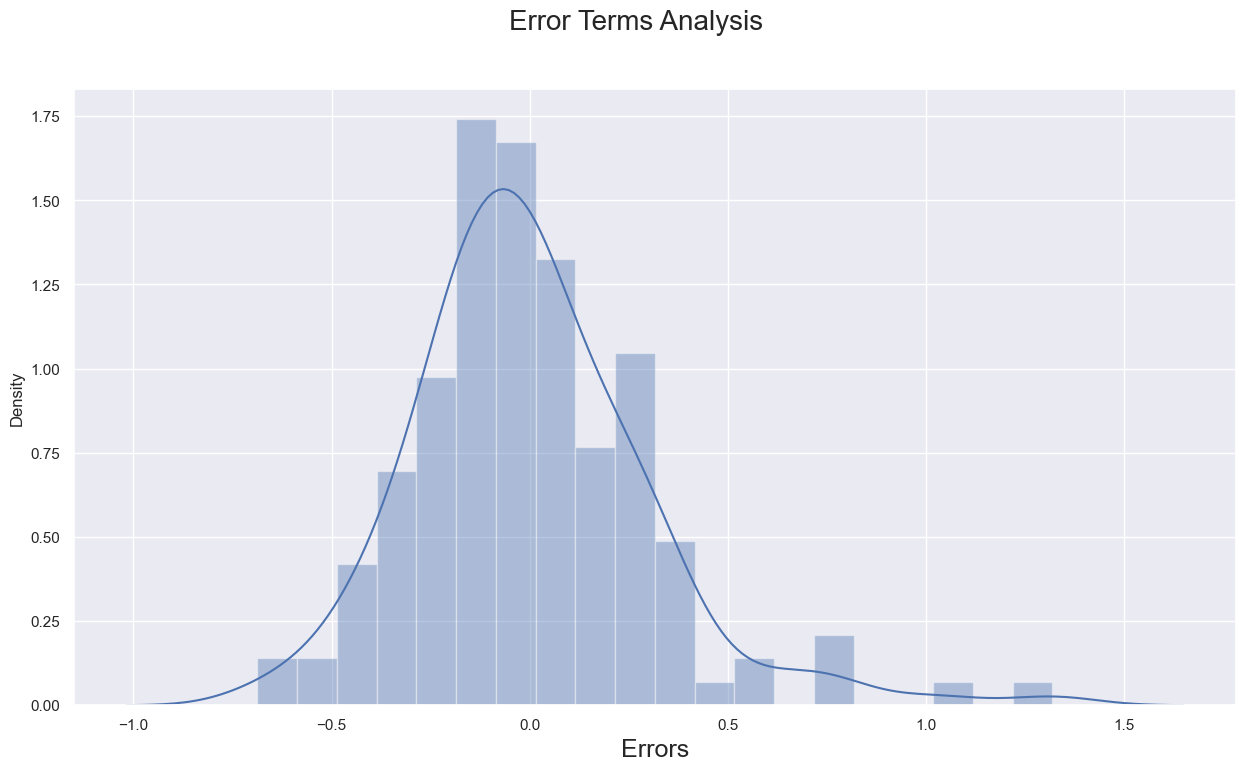

In [92]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

<a id="8"></a> <br>
##  Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [93]:
import warnings
warnings.filterwarnings("ignore")

df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(62, 32)

#### Dividing test set into X_test and y_test

In [94]:
y_test = df_test.pop('price')
X_test = df_test

In [95]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe10c.columns]

In [96]:
# Making predictions using the final model
y_pred = lm_rfe10.predict(X_test_new)

<a id="9"></a> <br>
##  Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

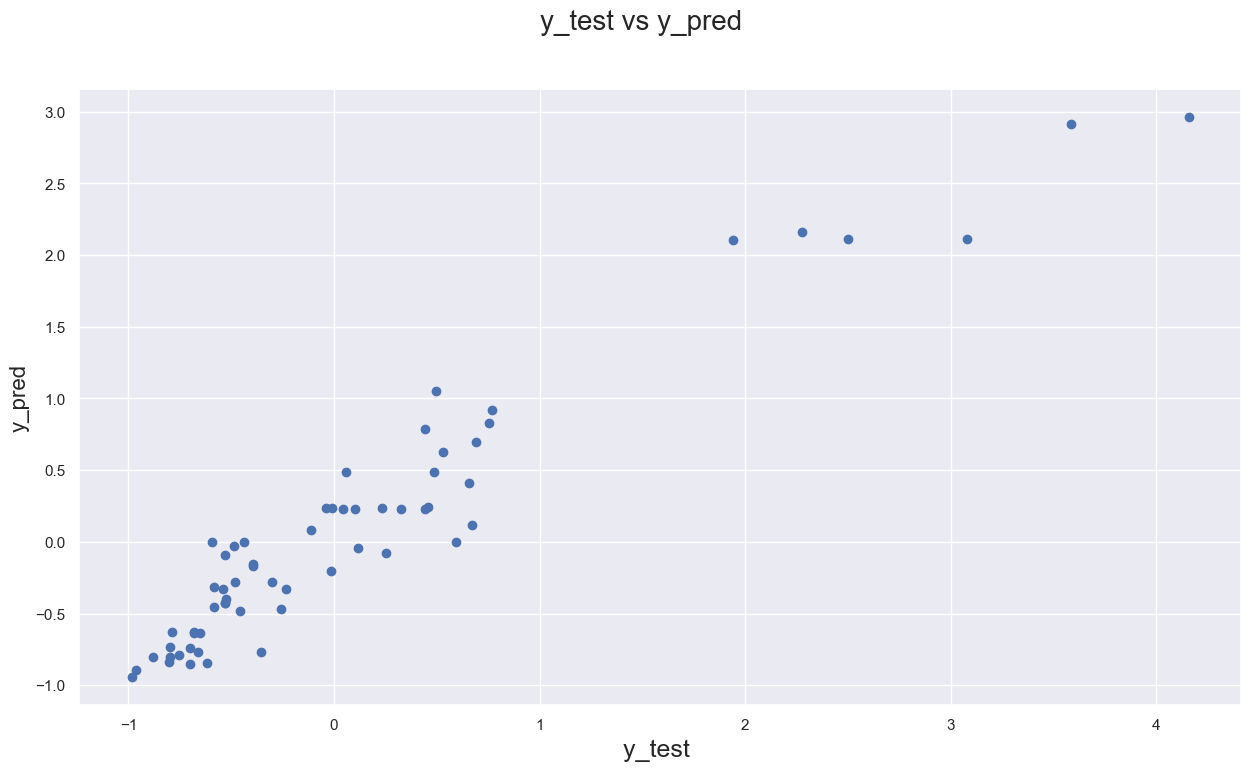

In [97]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    

### RMSE Score

In [98]:
r2_score(y_test, y_pred)

0.9094354289897942

**The R2 score of Training set is 0.912 and Test set is 0.909 which is quite close.
Hence, We can say that our model is good enough to predict the Car prices using below predictor variables**
- horsepower
- carwidth	
- Cars_Category_TopNotch_Cars
- carbody_hatchback
- enginetype_dohcv

#### Model I Conclusions:
- R-sqaured and Adjusted R-squared - 0.912 and 0.909 - 90% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 284.8 and 1.57e-70(approx. 0.0) - Model fit is significant and explained 90%<br> variance is just not by chance.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.

## MODEL 2
- With `lm_rfe8` which has basically 5 predictor variables.

##  Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [99]:
# Predicting the price of training set.
y_train_price2 = lm_rfe8.predict(X_train_rfe8c)

Text(0.5, 0, 'Errors')

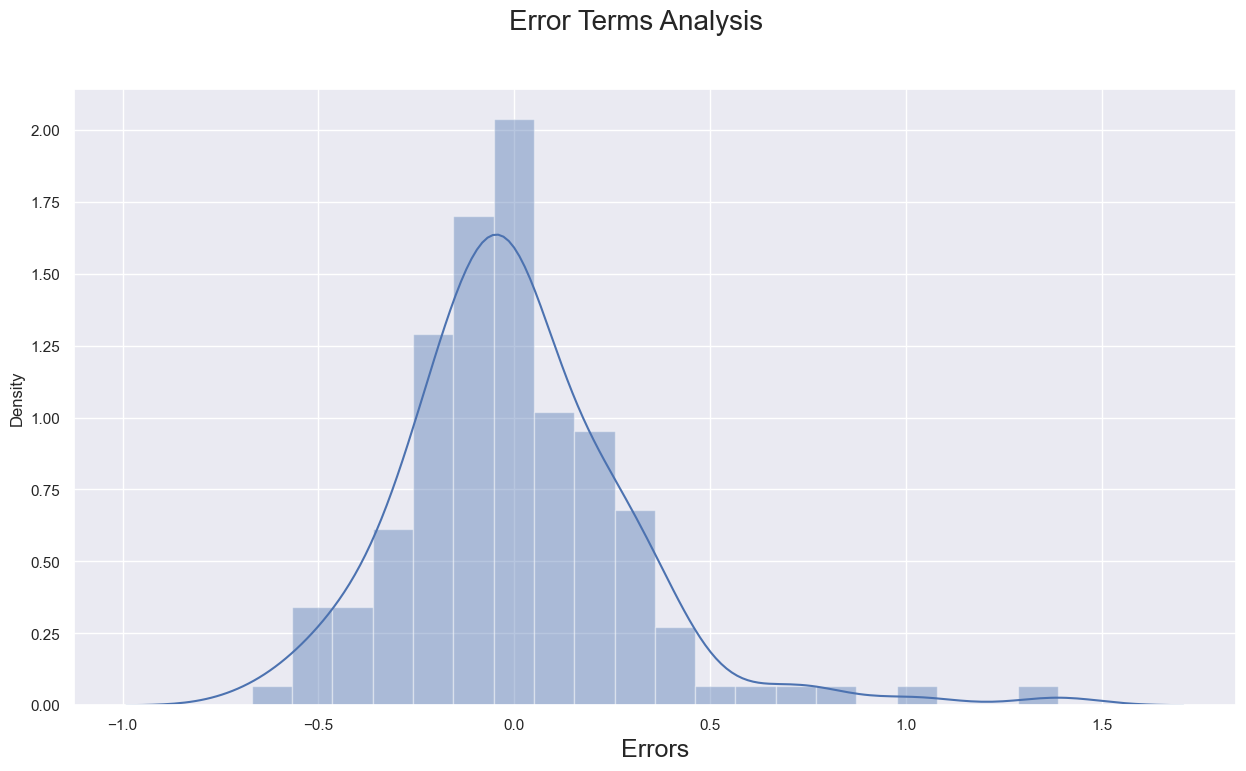

In [100]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price2), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

##  Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [101]:
X_test_2 = X_test_1[X_train_rfe8c.columns]

In [102]:
# Making predictions using the final model
y_pred2 = lm_rfe8.predict(X_test_2)

##  Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred2')

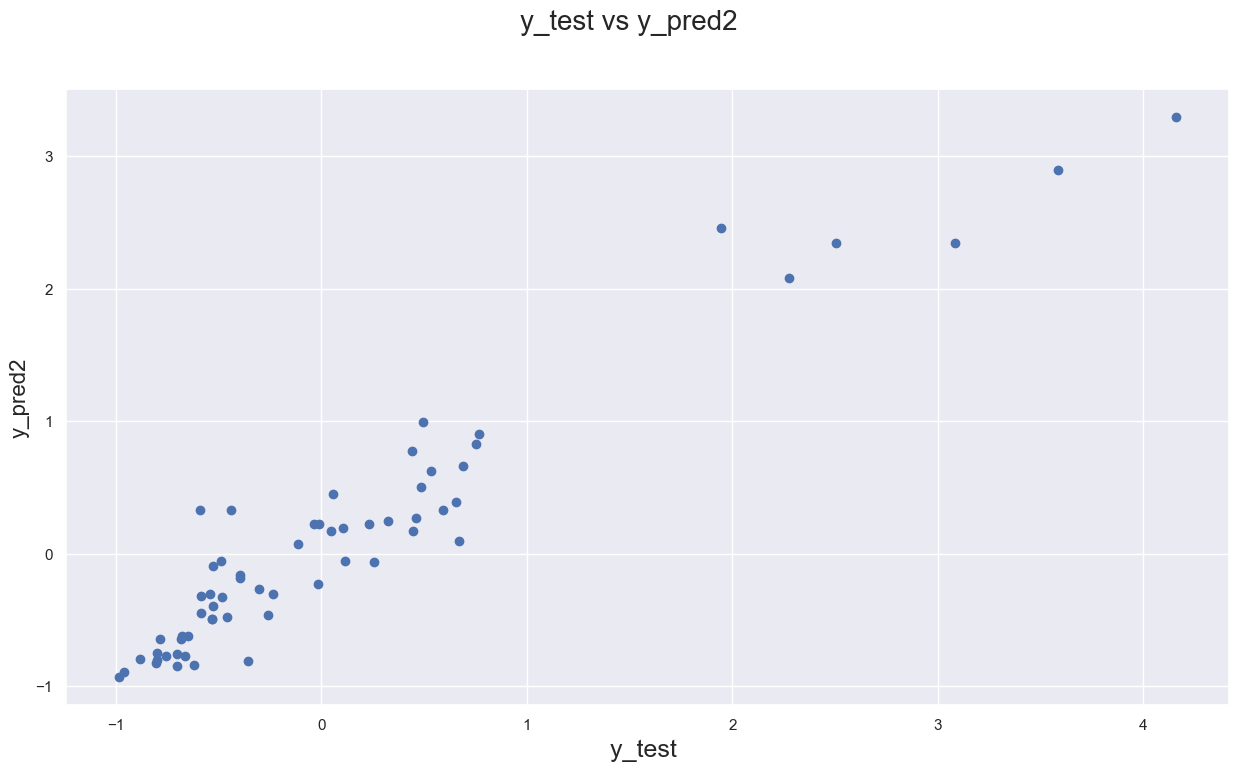

In [103]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred2)
fig.suptitle('y_test vs y_pred2', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred2', fontsize=16)    

### RMSE Score

In [104]:
r2_score(y_test, y_pred2)

0.915385372286651

**The R2 score of Training set is 0.918 and Test set is 0.915 which is quite close.
Hence, We can say that our model is good enough to predict the Car prices using below predictor variables**
- horsepower
- carwidth	
- Cars_Category_TopNotch_Cars
- carbody_hatchback
- enginetype_dohcv
- carbody_sedan                  
- carbody_wagon                  

#### Model II Conclusions:
- R-sqaured and Adjusted R-squared - 0.918 and 0.915 - 913.53% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 215.9 and 4.70e-70(approx. 0.0) - Model fit is significant and explained 90%<br> variance is just not by chance.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.

## MODEL 3
- With `lm_rfe9` which has basically 5 predictor variables.

##  Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [105]:
# Predicting the price of training set.
y_train_price3 = lm_rfe9.predict(X_train_rfe9c)

Text(0.5, 0, 'Errors')

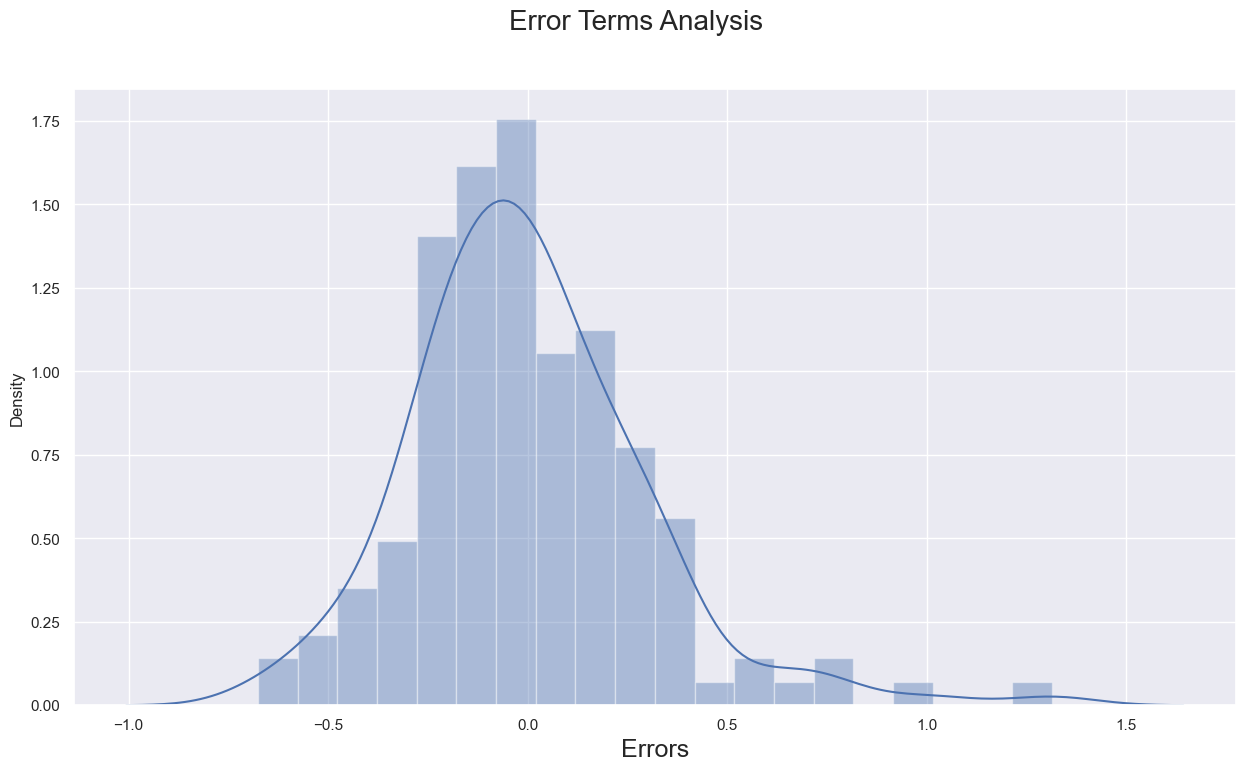

In [106]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price3), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

##  Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [107]:
X_test_3 = X_test_1[X_train_rfe9c.columns]

In [108]:
# Making predictions using the final model
y_pred3 = lm_rfe9.predict(X_test_3)

##  Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred3')

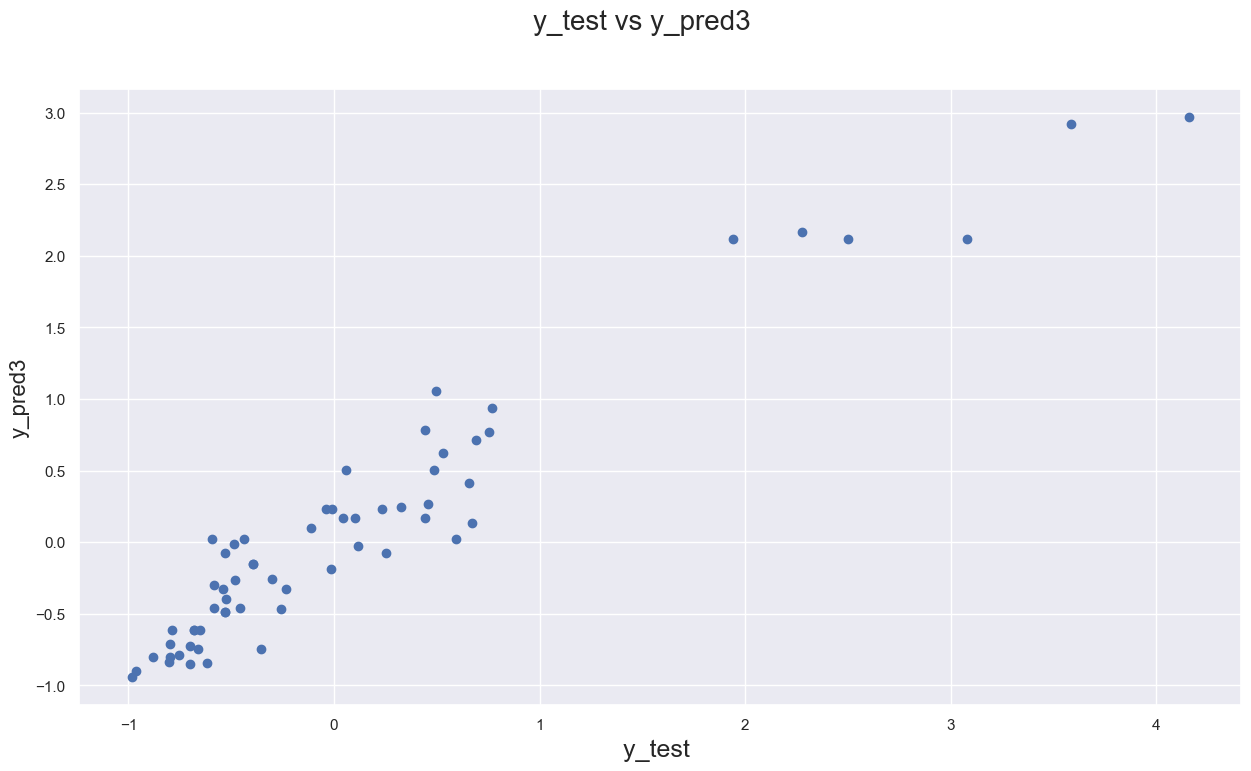

In [109]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred3)
fig.suptitle('y_test vs y_pred3', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred3', fontsize=16)

In [110]:
r2_score(y_test, y_pred3)

0.909343088104558

**The R2 score of Training set is 0.918 and Test set is 0.915 which is quite close.
Hence, We can say that our model is good enough to predict the Car prices using below predictor variables**
- horsepower
- carwidth	
- Cars_Category_TopNotch_Cars
- carbody_hatchback
- enginetype_dohcv
- carbody_sedan                  
  

#### Model III Conclusions:
- R-sqaured and Adjusted R-squared - 0.913 and 0.909 - 90.93% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 237.9 and 1.68e-69(approx. 0.0) - Model fit is significant and explained 91.53%<br> variance is just not by chance.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.

# Random Forest model

In [111]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Assuming X and y are your feature matrix and target variable
# Replace 'X' and 'y' with your actual variable names
# Also, ensure that X and y are properly preprocessed and split into training and testing sets

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.10864050636633965
R-squared: 0.9061060862540271


R-squared value is 0.906 it means that model is 90% variance explained

# Summary

**1.Horsepower Impact on Price:**
The variable horsepower is a significant predictor of car price in the model. This suggests that the power or performance of the car's engine, as indicated by its horsepower, has a strong influence on its price. For business stakeholders, this emphasizes the importance of engine performance in determining the market value of a car.

**2.Car Size (Car Width) Matters:**
The variable carwidth is included in the model, indicating that the physical dimensions of the car, particularly its width, play a crucial role in determining its price. This could align with consumer preferences for larger or more spacious vehicles, and it implies that car size contributes to perceived value.

**3.Top-Notch Cars and Price Premium:**
The presence of Cars_Category_TopNotch_Cars as a predictor suggests that certain categories of cars, likely those classified as "TopNotch," command a price premium. Businesswise, this could signify that high-end or premium cars with special features, advanced technology, or luxury amenities tend to have higher price tags.

**4.Car Body Type Impact:**
The inclusion of carbody_hatchback as a predictor implies that the type of car body can influence its price. In this case, hatchback cars might have a distinct pricing pattern compared to other body types. This insight could guide marketing and pricing strategies based on the popularity or uniqueness of different car body styles.

**5.Special Engine Type (dohcv):**
The variable enginetype_dohcv indicates that cars with a specific engine type (double overhead camshaft, DOHC, with variable valve timing) have a notable impact on price. This could suggest that advanced or specialized engine technologies contribute to the overall value of a car.









**Understanding Customer Preferences:**
The identified variables offer insights into customer preferences and priorities when it comes to purchasing cars. For example, customers may place a premium on powerful engines, spacious interiors, certain body styles, or technologically advanced features.

**Targeted Marketing Strategies:**
The business can leverage these insights to tailor marketing strategies. For instance, emphasizing the powerful engines and advanced features of certain car models, highlighting size and spaciousness, and promoting premium categories can be part of targeted marketing campaigns.

**Pricing Strategy:**
The model suggests that certain features and characteristics contribute significantly to a car's perceived value. Adjusting pricing strategies based on these insights can help optimize revenue and align prices with customer expectations.
In summary, the identified variables offer valuable insights into the factors influencing car prices. This understanding can inform strategic decisions related to product development, marketing, and pricing, ultimately contributing to the business's competitiveness in the automotive market.


- All the models are good enough to predict the carprices which explains the variance of data upto 90% and the model is significant.